In [1]:
library(RColorBrewer)
coul <- brewer.pal(8, "Set3") 

# Estimación en balanzas analíticas desde 0.001 g hasta 500 g

La resolución seleccionada es de $0.0001\textrm{ g}$ pues es la de la balanza analítica que se tiene en el laboratorio.

## JP-02

In [2]:
N=10**6
d=0.0001 # kg
L_exc=200 # kg
m_n=array(c(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500),dim=c(18,1))
dmc=array(c(-0.000003,0.0000176,0.000005,0.000008,-0.000008,0.000003,0.00001,0.000007,-0.000007,0.000039,0.000002,0.000027,0.000093,0.000111,0.000290,0.00014,0.00027,-0.00014),dim=c(18,1))
m_c=m_n+dmc
Is=c(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500)
U_exp=array(c(0.000011,0.0000085,0.000016,0.000022,0.0000095,0.000052,0.00011,0.000013,0.000013,0.000013,0.000017,0.000039,0.000023,0.000031,0.0000044,0.00008,0.00015,0.00038),dim=c(18,1))
EMP=array(c(0.00002,0.00002,0.00002,0.000025,0.00003,0.00004,0.00005,0.00006,0.00008,0.0001,0.00012,0.00016,0.0002,0.00025,0.0003,0.0005,0.001,0.0025),dim=c(18,1))
Rep50=c(250,250,250,250,250)
Rep100=c(500,500,500,500,500)
I_exc=c(200,200,200,200,200,200)
dif_max=max(abs(I_exc[2:5]-mean(I_exc[1],I_exc[6])))
error=Is-m_c

Las incertidumbres por resolución siguen una distribución uniforme que va de $$\left[-\frac{d}{2},\quad\frac{d}{2}\right]$$

Donde:
- $d$ es la división de escala de la balanza.

In [3]:
u_res=array(dim=c(18,N),runif(18*N,-d/2,d/2))
u_res0=array(dim=c(18,N),runif(18*N,-d/2,d/2))

La incertidumbre por excentricidad sigue una distribución uniforme que se encuentra entre $$\left[\frac{-\Delta I_{\textrm{máx}}\cdot I}{2L_{\textrm{exc}}},\quad\frac{\Delta I_{\textrm{máx}}\cdot I}{2L_{\textrm{exc}}}\right]$$

Donde:
- $\Delta I_{\textrm{máx}}$ es la diferencia máxima calculada de la prueba de excentricidad.
- $I$ es la indicación de la balanza.
- $L_{\textrm{exc}}$ es la carga usada en la prueba de excentricidad.

In [4]:
u_exc=array(dim=c(18,N),runif(18*N,-dif_max*Is/L_exc/2,dif_max*Is/L_exc/2))

La incertidumbre por deriva de los patrones sigue una distribución uniforme que se encuentra entre $$\left[\frac{-\textrm{EMP}}{3},\quad\frac{\textrm{EMP}}{3}\right]$$

Donde:
- $\textrm{EMP}$ es el error máximo permitido de las pesas utilizadas.

In [5]:
u_der=array(dim=c(18,N),runif(18*N,-EMP/3,EMP/3))

La incertidumbre por repetibilidad sigue una distribución normal de media $0$ y desviación estándar igual a la obtenida de la prueba de repetibilidad.

In [6]:
u_rep=array(dim=c(18,N),rnorm(18*N,mean=0,sd=max(sd(Rep50),sd(Rep100))))

La incertidumbre por empuje del aire sigue una distribución uniforme delimitada por $$\left[\frac{-1.56\sqrt{3}\cdot m_c}{1\times10^6},\quad\frac{1.56\sqrt{3}\cdot m_c}{1\times10^6}\right]$$

Donde:
- $m_c$ es la masa convencional de los patrones.

In [7]:
u_empj=array(dim=c(18,N),runif(18*N,-sqrt(3)*m_c*0.00000156,sqrt(3)*m_c*0.00000156))

La incertidumbre de las masas patrón sigue una distribución normal con media $0$ y desviación estándar igual a $U/k$ con $U$ la incertidumbre expandida y $k=2$ el factor de covertura.

In [8]:
u_mc=array(dim=c(18,N),rnorm(18*N,mean=0,sd=U_exp/2))

Se realiza la convolución de las funciones de distribución de las distintas fuentes de incertidumbre.

In [9]:
cal=rep(error,N)+u_mc+u_empj+u_res0+u_res+u_exc+u_der+u_rep

In [10]:
resumen=matrix(0,18,11)
for (i in 1:18){
    resumen[i,1]=Is[i]
    resumen[i,2]=round(mean(cal[i,]),6)
    resumen[i,3]=round(sd(u_exc[i,]),6)
    resumen[i,4]=round(sd(u_rep[i,]),6)
    resumen[i,5]=round(sd(u_der[i,]),6)
    resumen[i,6]=round(sd(u_mc[i,]),6)
    resumen[i,7]=round(sd(u_empj[i,]),6)
    resumen[i,8]=round(sd(u_res[i,]),6)
    resumen[i,9]=round(sd(u_res0[i,]),6)
    resumen[i,10]=round(sd(cal[i,]),6)
    resumen[i,11]=round(2*sd(cal[i,]),6)
    }

In [11]:
df=data.frame(resumen)

In [12]:
colnames(df)=c("Indicación (g)","Error de indicación (g)","Excentricidad (g)","Repetibilidad (g)","Deriva (g)","Patrones (g)","Empuje (g)","Resolución (g)","Resolución sin carga (g)","Incertidumbre estándar (g)","Incertidumbre expandida (g)")
df

Indicación (g) Error de indicación (g) Excentricidad (g) Repetibilidad (g)
1  1e-03           0.000003               0                 0                
2  2e-03          -0.000018               0                 0                
3  5e-03          -0.000005               0                 0                
4  1e-02          -0.000008               0                 0                
5  2e-02           0.000008               0                 0                
6  5e-02          -0.000003               0                 0                
7  1e-01          -0.000010               0                 0                
8  2e-01          -0.000007               0                 0                
9  5e-01           0.000007               0                 0                
10 1e+00          -0.000039               0                 0                
11 2e+00          -0.000002               0                 0                
12 5e+00          -0.000027               0                 0                
13 1e+01          -0.000093               0                 0                
14 2e+01          -0.000111               0                 0                
15 5e+01          -0.000290               0                 0                
16 1e+02          -0.000140               0                 0                
17 2e+02          -0.000271               0                 0                
18 5e+02           0.000140               0                 0                
   Deriva (g) Patrones (g) Empuje (g) Resolución (g) Resolución sin carga (g)
1  0.000004   5.0e-06      0.000000   2.9e-05        2.9e-05                 
2  0.000004   4.0e-06      0.000000   2.9e-05        2.9e-05                 
3  0.000004   8.0e-06      0.000000   2.9e-05        2.9e-05                 
4  0.000005   1.1e-05      0.000000   2.9e-05        2.9e-05                 
5  0.000006   5.0e-06      0.000000   2.9e-05        2.9e-05                 
6  0.000008   2.6e-05      0.000000   2.9e-05        2.9e-05                 
7  0.000010   5.5e-05      0.000000   2.9e-05        2.9e-05                 
8  0.000012   7.0e-06      0.000000   2.9e-05        2.9e-05                 
9  0.000015   6.0e-06      0.000001   2.9e-05        2.9e-05                 
10 0.000019   6.0e-06      0.000002   2.9e-05        2.9e-05                 
11 0.000023   9.0e-06      0.000003   2.9e-05        2.9e-05                 
12 0.000031   2.0e-05      0.000008   2.9e-05        2.9e-05                 
13 0.000039   1.2e-05      0.000016   2.9e-05        2.9e-05                 
14 0.000048   1.5e-05      0.000031   2.9e-05        2.9e-05                 
15 0.000058   2.0e-06      0.000078   2.9e-05        2.9e-05                 
16 0.000096   4.0e-05      0.000156   2.9e-05        2.9e-05                 
17 0.000192   7.5e-05      0.000312   2.9e-05        2.9e-05                 
18 0.000481   1.9e-04      0.000780   2.9e-05        2.9e-05                 
   Incertidumbre estándar (g) Incertidumbre expandida (g)
1  0.000041                   0.000083                   
2  0.000041                   0.000082                   
3  0.000042                   0.000084                   
4  0.000043                   0.000085                   
5  0.000042                   0.000083                   
6  0.000049                   0.000098                   
7  0.000069                   0.000138                   
8  0.000043                   0.000086                   
9  0.000044                   0.000088                   
10 0.000046                   0.000091                   
11 0.000048                   0.000096                   
12 0.000055                   0.000110                   
13 0.000059                   0.000119                   
14 0.000072                   0.000144                   
15 0.000105                   0.000211                   
16 0.000192                   0.000384                   
17 0.000376                   0.000753               

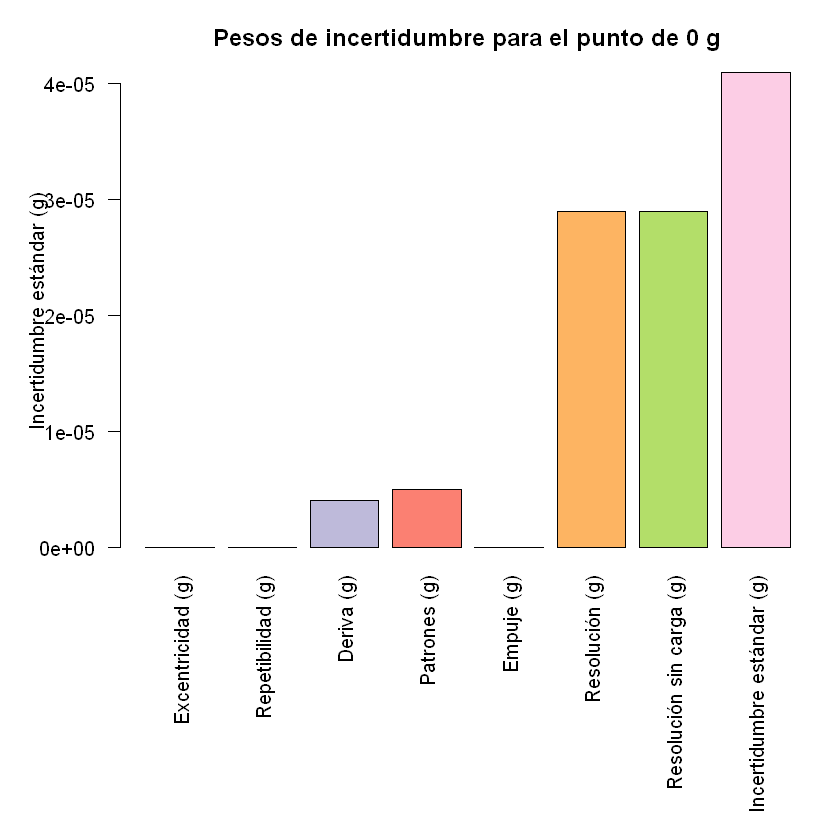

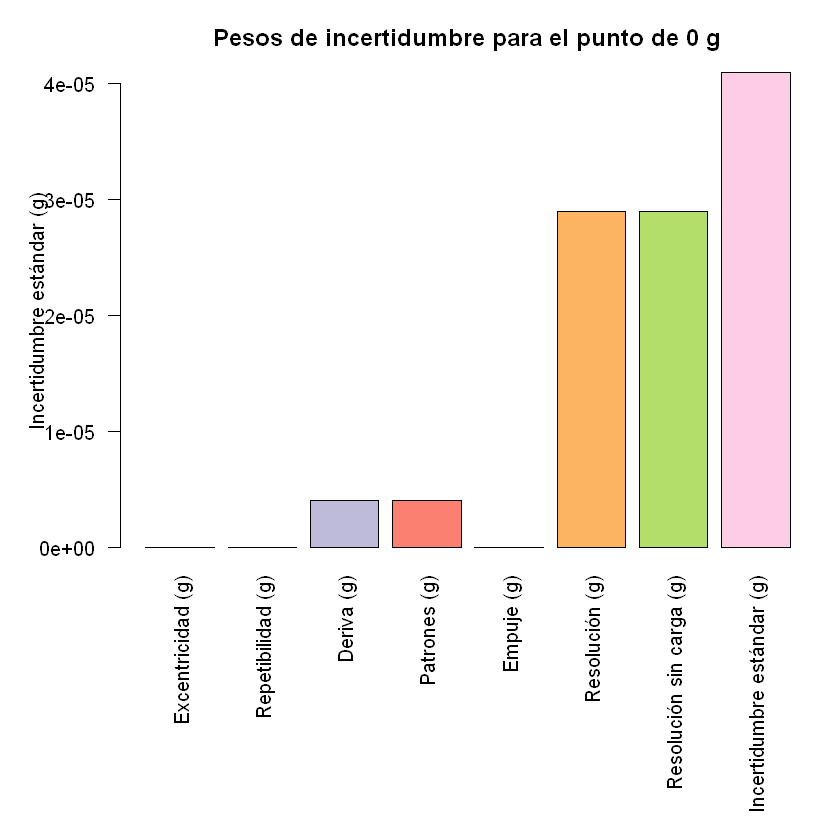

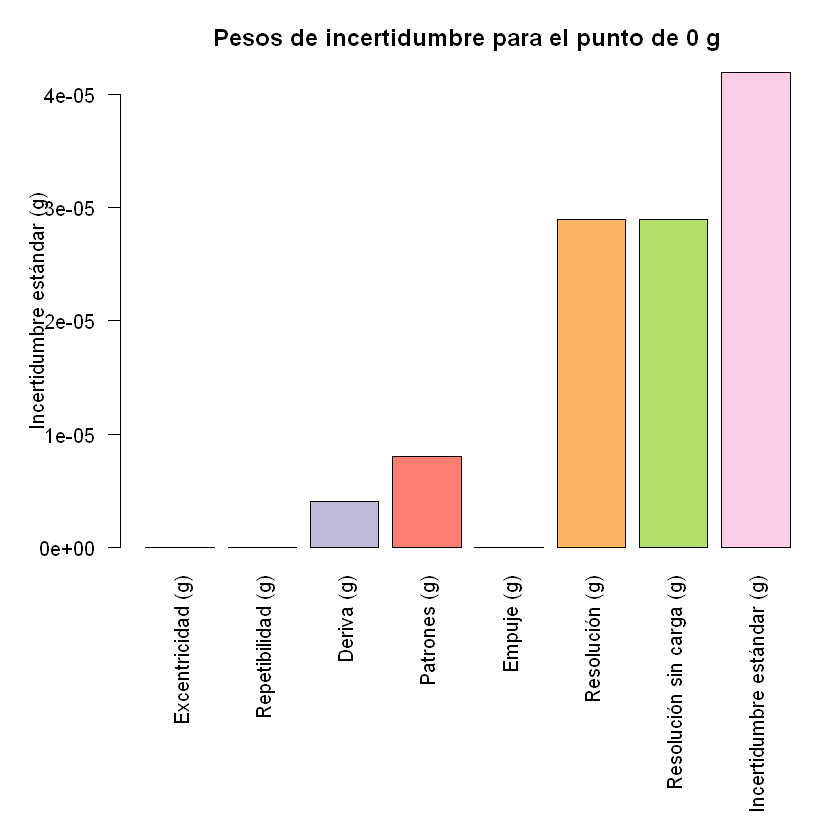

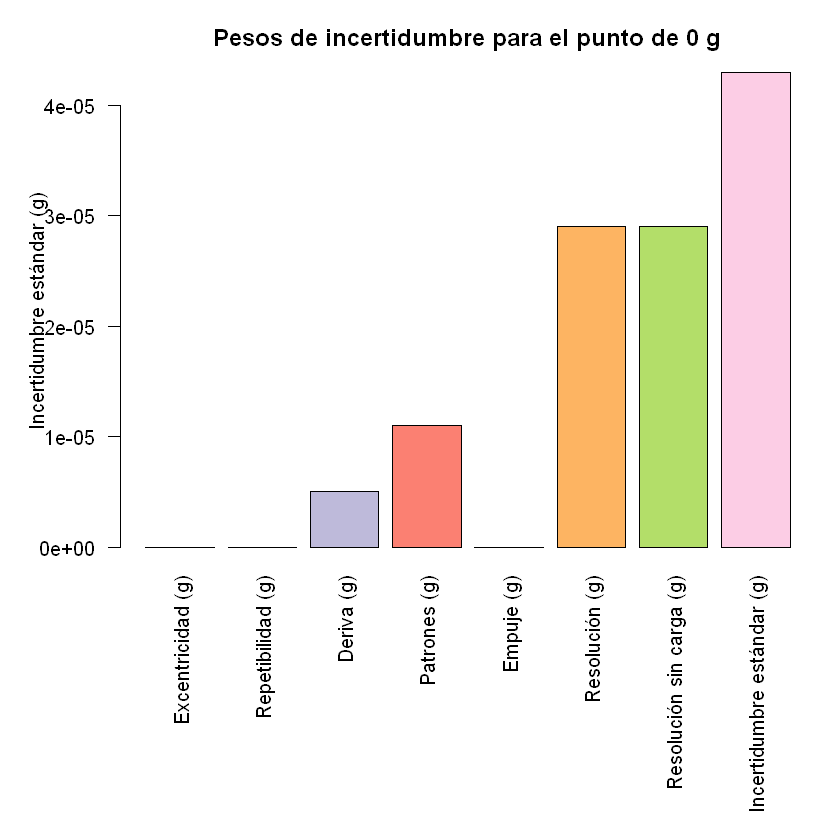

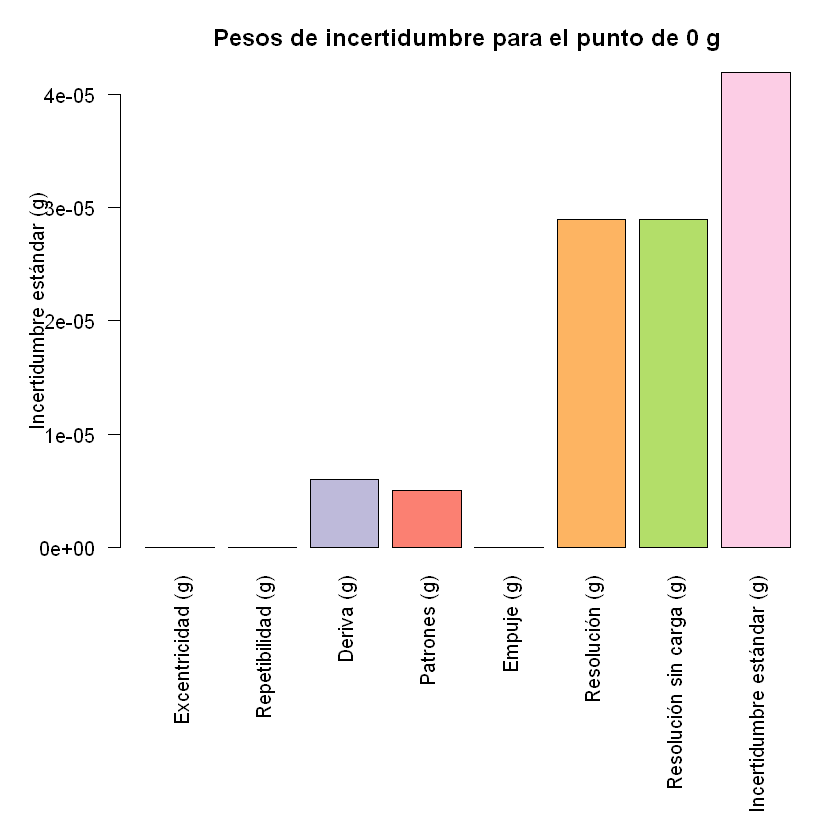

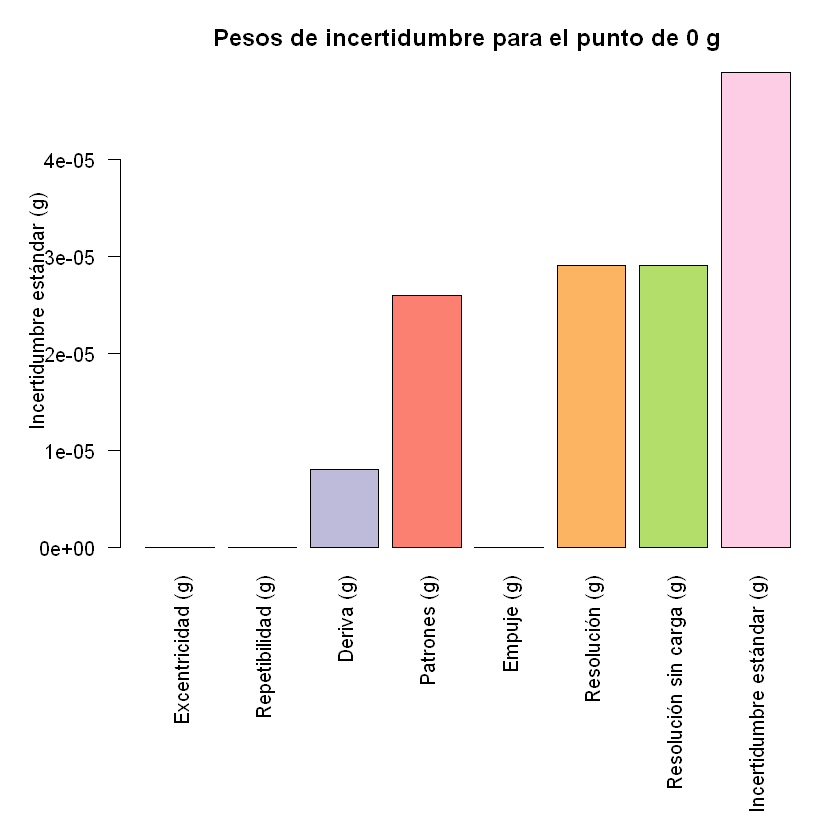

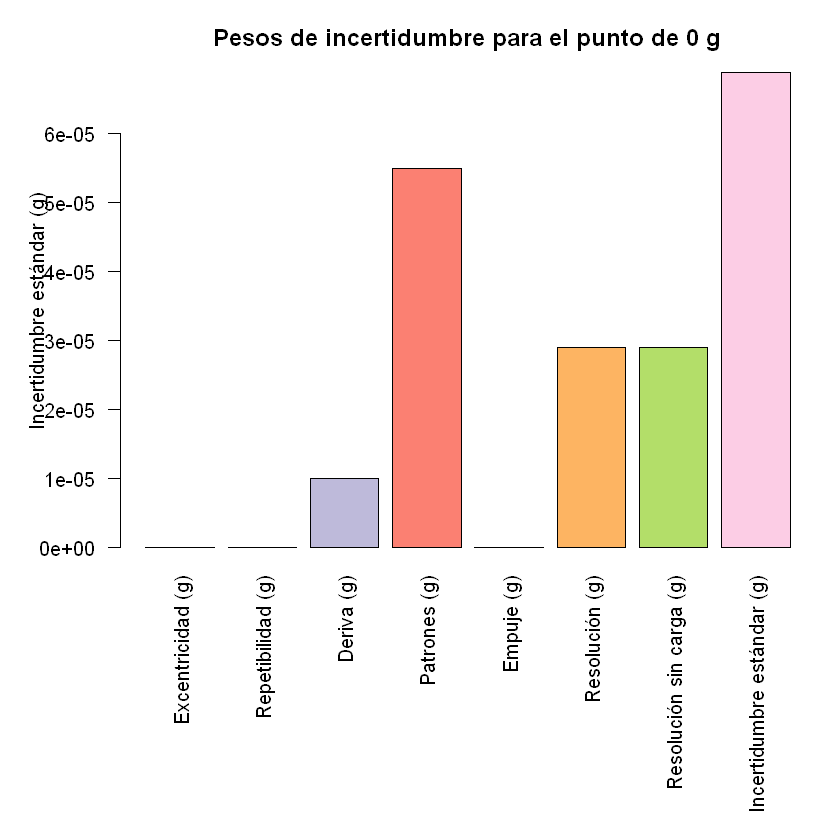

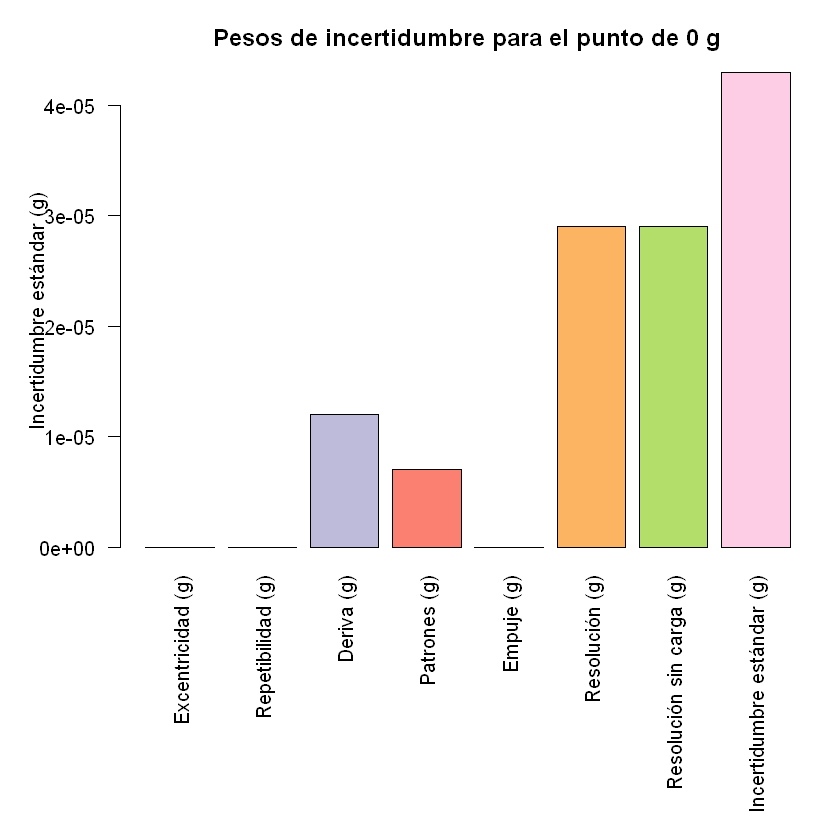

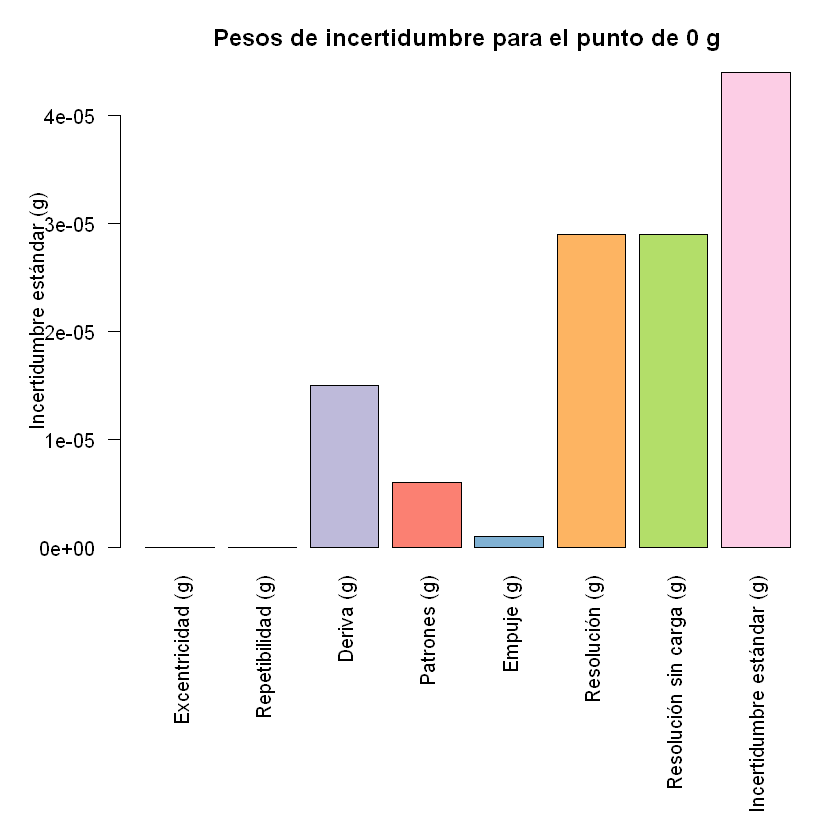

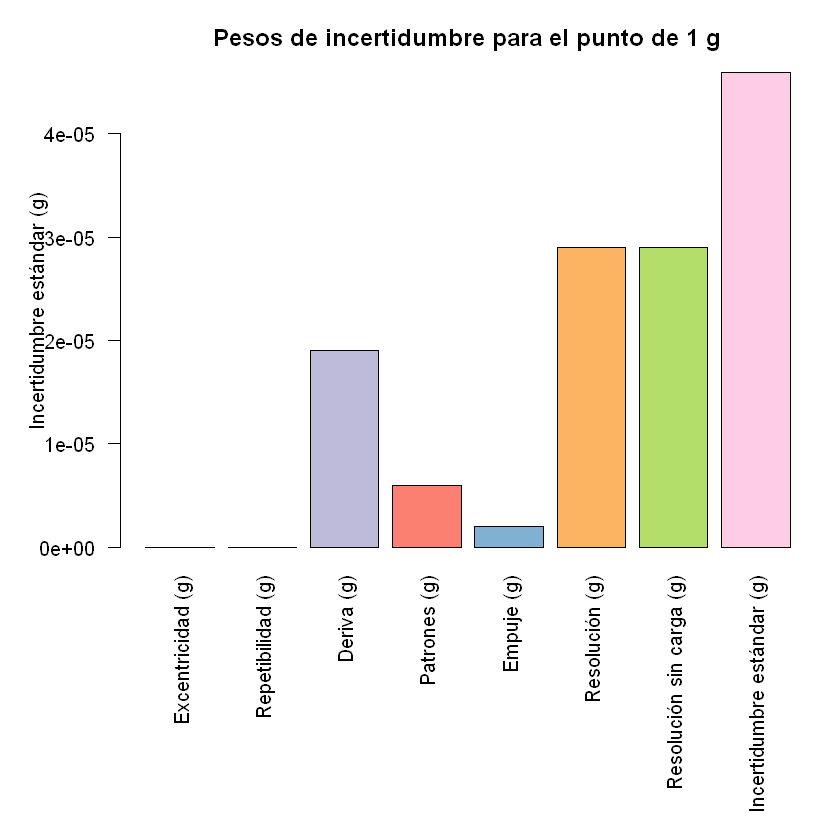

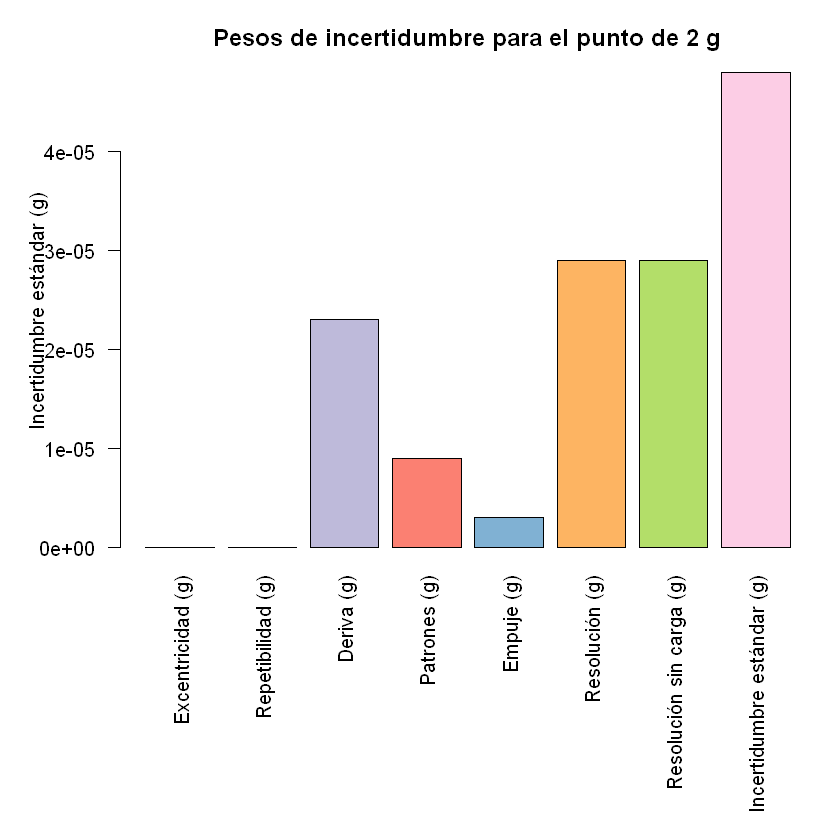

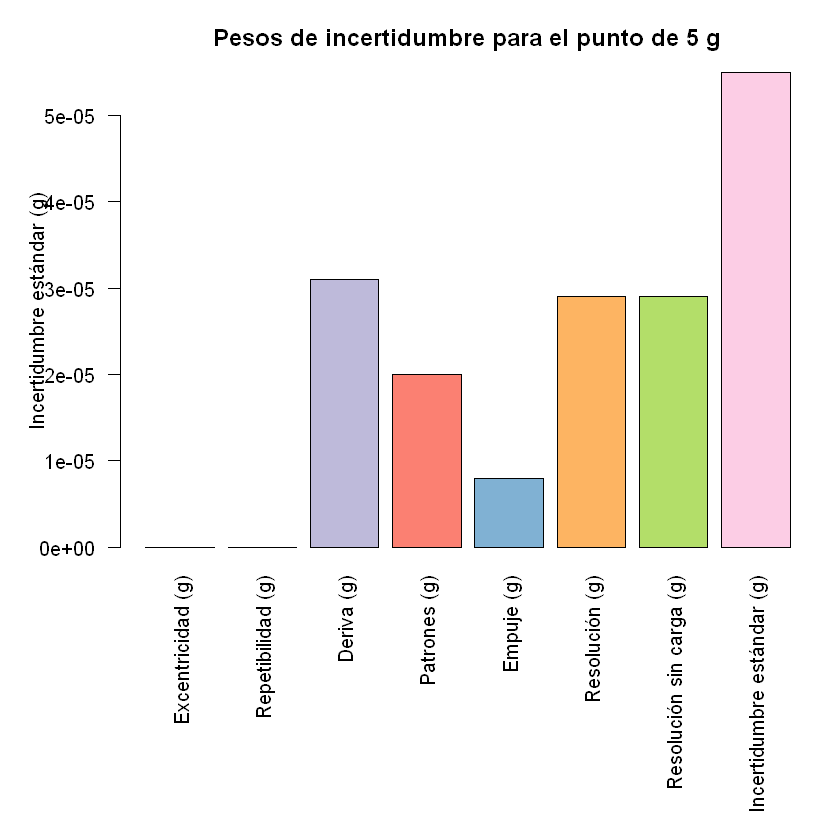

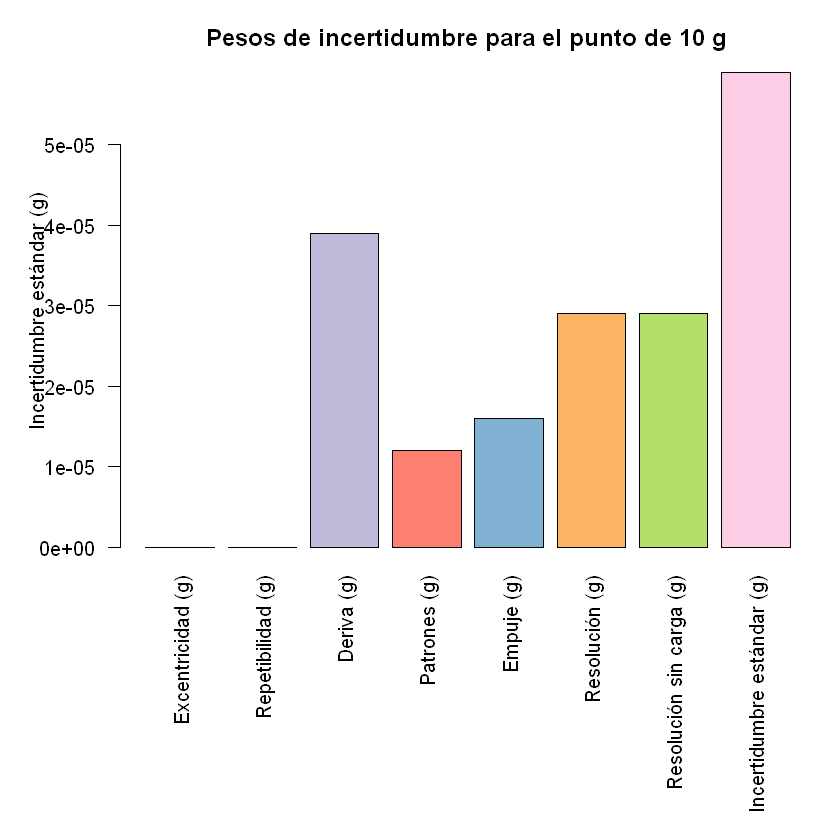

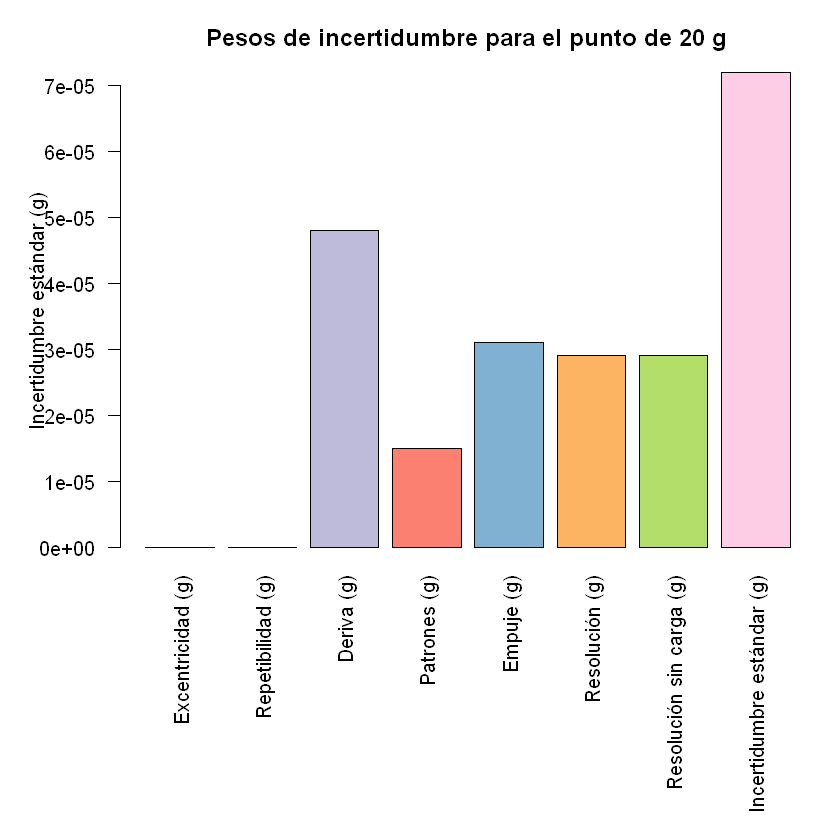

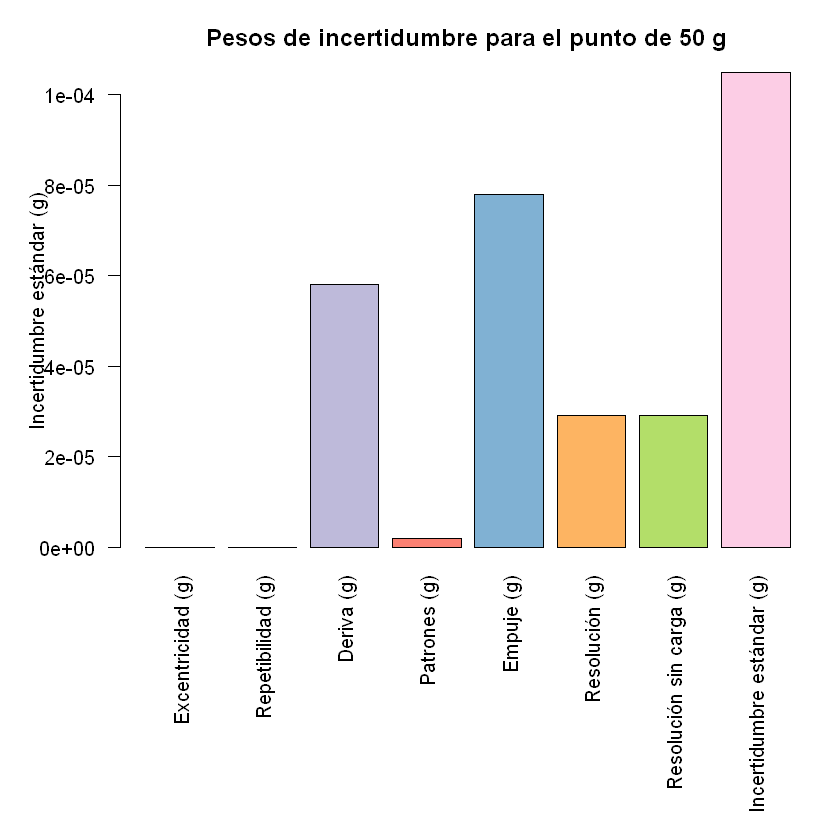

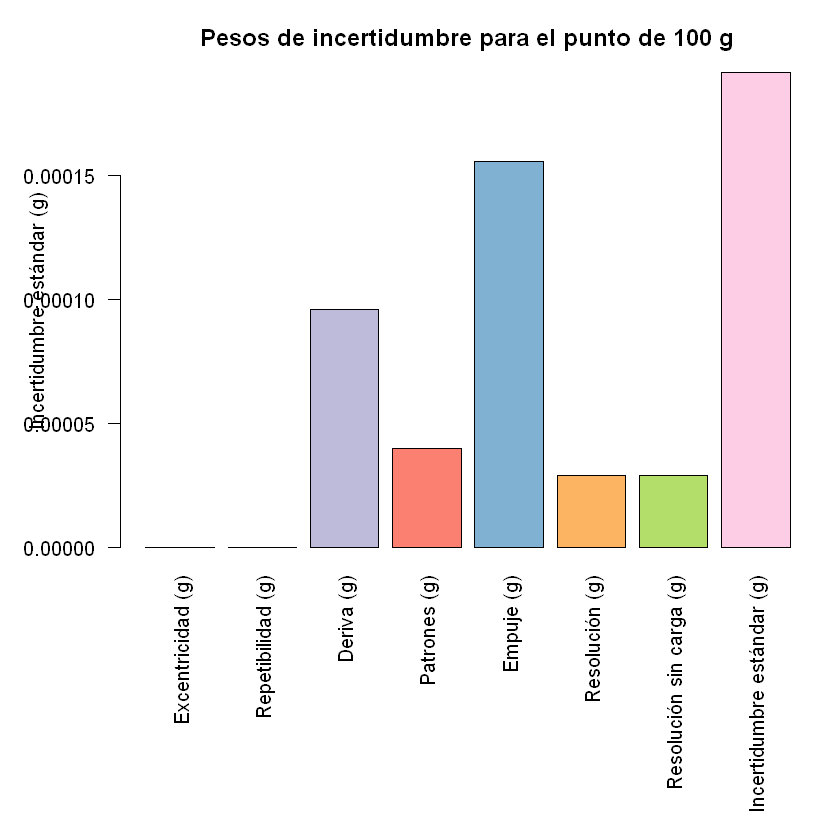

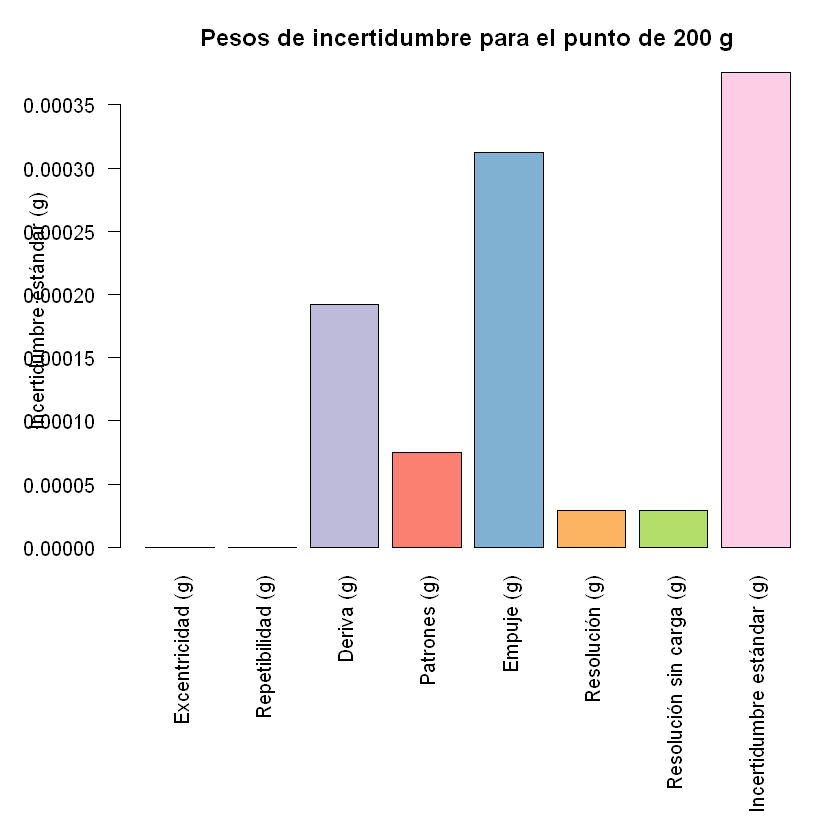

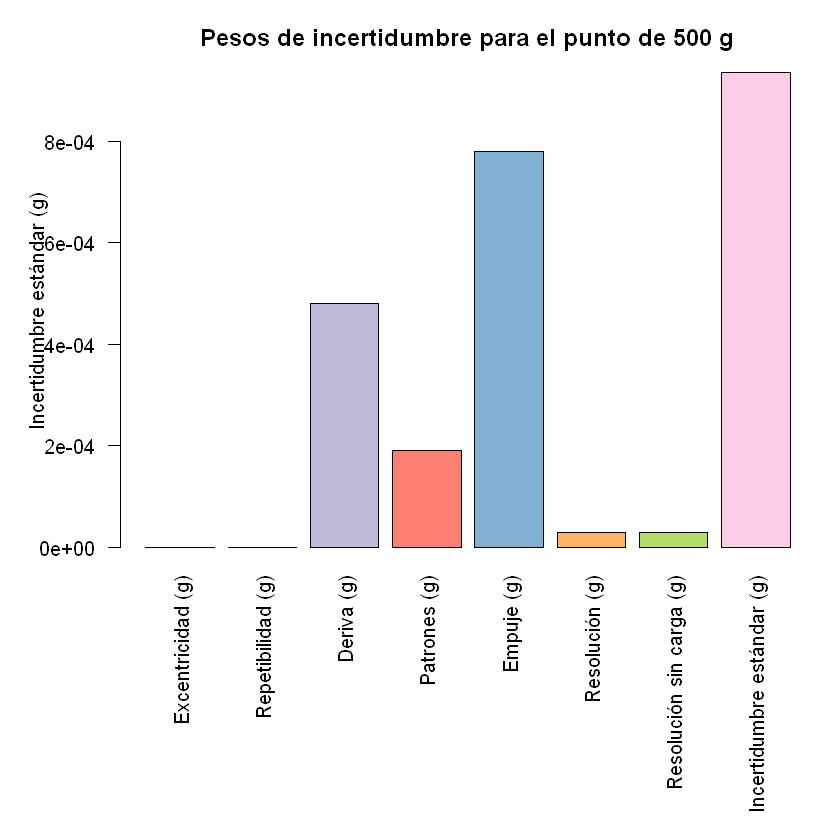

In [13]:
for (i in 1:(nrow(df))){
    par(mar=c(12,5,3,1))
    barplot(unlist(df[i,3:10]),names.arg=colnames(df)[3:10],las=2,col=coul, ylab="Incertidumbre estándar (g)",main=paste("Pesos de incertidumbre para el punto de",toString(round(m_c[i])),"g",sep=" "))
    }

In [14]:
jp02=df

## JP-01

In [15]:
N=10**6
d=0.0001 # kg
L_exc=200 # kg
# m_n=array(c(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500),dim=c(18,1))
# dmc=array(c(-0.000003,0.0000176,0.000005,0.000008,-0.000008,0.000003,0.00001,0.000007,-0.000007,0.000039,0.000002,0.000027,0.000093,0.000111,0.000290,0.00014,0.00027,-0.00014),dim=c(18,1))
m_c=array(c(0.9992/1000,2.0047/1000,5.0022/1000,10.0028/1000,20.0009/1000,49.9996/1000,99.9949/1000,200.0212/1000,500.0149/1000,0.99984,2.000026,5.000072,9.999941,19.999875,50.000099,100.000231,200.00040,500.00029),dim=c(18,1))
Is=c(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500)
U_exp=array(c(0.0023/1000,0.0023/1000,0.0023/1000,0.003/1000,0.0036/1000,0.0043/1000,0.0057/1000,0.0072/1000,0.0088/1000,0.014/1000,0.017/1000,0.021/1000,0.024/1000,0.031/1000,0.039/1000,0.064/1000,0.15/1000,0.34/1000),dim=c(18,1))
EMP=array(c(0.00002,0.00002,0.00002,0.000025,0.00003,0.00004,0.00005,0.00006,0.00008,0.0001,0.00012,0.00016,0.0002,0.00025,0.0003,0.0005,0.001,0.0025),dim=c(18,1))
Rep50=c(250,250,250,250,250)
Rep100=c(500,500,500,500,500)
I_exc=c(200,200,200,200,200,200)
dif_max=max(abs(I_exc[2:5]-mean(I_exc[1],I_exc[6])))
error=Is-m_c

In [16]:
u_res=array(dim=c(18,N),runif(18*N,-d/2,d/2))
u_res0=array(dim=c(18,N),runif(18*N,-d/2,d/2))

In [17]:
u_exc=array(dim=c(18,N),runif(18*N,-dif_max*Is/L_exc/2,dif_max*Is/L_exc/2))
u_der=array(dim=c(18,N),runif(18*N,-EMP/3,EMP/3))
u_rep=array(dim=c(18,N),rnorm(18*N,mean=0,sd=max(sd(Rep50),sd(Rep100))))
u_empj=array(dim=c(18,N),runif(18*N,-sqrt(3)*m_c*0.00000156,sqrt(3)*m_c*0.00000156))
u_mc=array(dim=c(18,N),rnorm(18*N,mean=0,sd=U_exp/2))

In [18]:
cal=rep(error,N)+u_mc+u_empj+u_res0+u_res+u_exc+u_der+u_rep

In [19]:
resumen=matrix(0,18,11)
for (i in 1:18){
    resumen[i,1]=Is[i]
    resumen[i,2]=round(mean(cal[i,]),6)
    resumen[i,3]=round(sd(u_exc[i,]),6)
    resumen[i,4]=round(sd(u_rep[i,]),6)
    resumen[i,5]=round(sd(u_der[i,]),6)
    resumen[i,6]=round(sd(u_mc[i,]),6)
    resumen[i,7]=round(sd(u_empj[i,]),6)
    resumen[i,8]=round(sd(u_res[i,]),6)
    resumen[i,9]=round(sd(u_res0[i,]),6)
    resumen[i,10]=round(sd(cal[i,]),6)
    resumen[i,11]=round(2*sd(cal[i,]),6)
    }
df=data.frame(resumen)
colnames(df)=c("Indicación (g)","Error de indicación (g)","Excentricidad (g)","Repetibilidad (g)","Deriva (g)","Patrones (g)","Empuje (g)","Resolución (g)","Resolución sin carga (g)","Incertidumbre estándar (g)","Incertidumbre expandida (g)")
df

Indicación (g) Error de indicación (g) Excentricidad (g) Repetibilidad (g)
1  1e-03           0.000001               0                 0                
2  2e-03          -0.000005               0                 0                
3  5e-03          -0.000002               0                 0                
4  1e-02          -0.000003               0                 0                
5  2e-02          -0.000001               0                 0                
6  5e-02           0.000000               0                 0                
7  1e-01           0.000005               0                 0                
8  2e-01          -0.000021               0                 0                
9  5e-01          -0.000015               0                 0                
10 1e+00           0.000160               0                 0                
11 2e+00          -0.000026               0                 0                
12 5e+00          -0.000072               0                 0                
13 1e+01           0.000059               0                 0                
14 2e+01           0.000125               0                 0                
15 5e+01          -0.000099               0                 0                
16 1e+02          -0.000231               0                 0                
17 2e+02          -0.000400               0                 0                
18 5e+02          -0.000289               0                 0                
   Deriva (g) Patrones (g) Empuje (g) Resolución (g) Resolución sin carga (g)
1  0.000004   1.0e-06      0.000000   2.9e-05        2.9e-05                 
2  0.000004   1.0e-06      0.000000   2.9e-05        2.9e-05                 
3  0.000004   1.0e-06      0.000000   2.9e-05        2.9e-05                 
4  0.000005   2.0e-06      0.000000   2.9e-05        2.9e-05                 
5  0.000006   2.0e-06      0.000000   2.9e-05        2.9e-05                 
6  0.000008   2.0e-06      0.000000   2.9e-05        2.9e-05                 
7  0.000010   3.0e-06      0.000000   2.9e-05        2.9e-05                 
8  0.000012   4.0e-06      0.000000   2.9e-05        2.9e-05                 
9  0.000015   4.0e-06      0.000001   2.9e-05        2.9e-05                 
10 0.000019   7.0e-06      0.000002   2.9e-05        2.9e-05                 
11 0.000023   8.0e-06      0.000003   2.9e-05        2.9e-05                 
12 0.000031   1.0e-05      0.000008   2.9e-05        2.9e-05                 
13 0.000038   1.2e-05      0.000016   2.9e-05        2.9e-05                 
14 0.000048   1.5e-05      0.000031   2.9e-05        2.9e-05                 
15 0.000058   1.9e-05      0.000078   2.9e-05        2.9e-05                 
16 0.000096   3.2e-05      0.000156   2.9e-05        2.9e-05                 
17 0.000193   7.5e-05      0.000312   2.9e-05        2.9e-05                 
18 0.000481   1.7e-04      0.000780   2.9e-05        2.9e-05                 
   Incertidumbre estándar (g) Incertidumbre expandida (g)
1  0.000041                   0.000082                   
2  0.000041                   0.000082                   
3  0.000041                   0.000082                   
4  0.000041                   0.000082                   
5  0.000041                   0.000083                   
6  0.000042                   0.000083                   
7  0.000042                   0.000084                   
8  0.000043                   0.000085                   
9  0.000044                   0.000088                   
10 0.000046                   0.000091                   
11 0.000048                   0.000096                   
12 0.000053                   0.000106                   
13 0.000059                   0.000119                   
14 0.000072                   0.000144                   
15 0.000107                   0.000214                   
16 0.000191                   0.000381                   
17 0.000376                   0.000753               

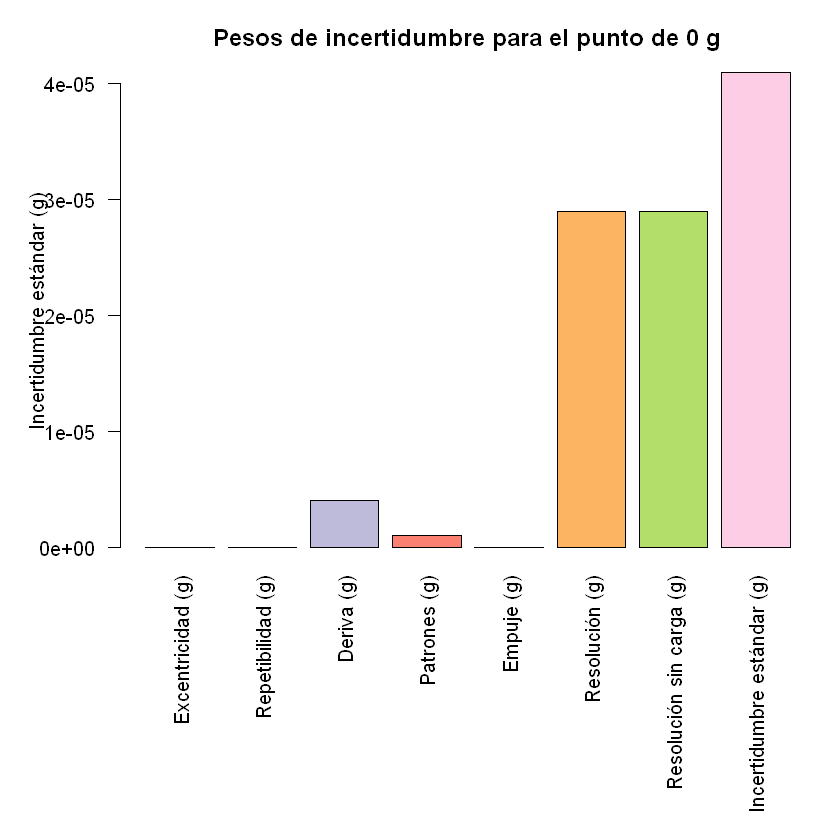

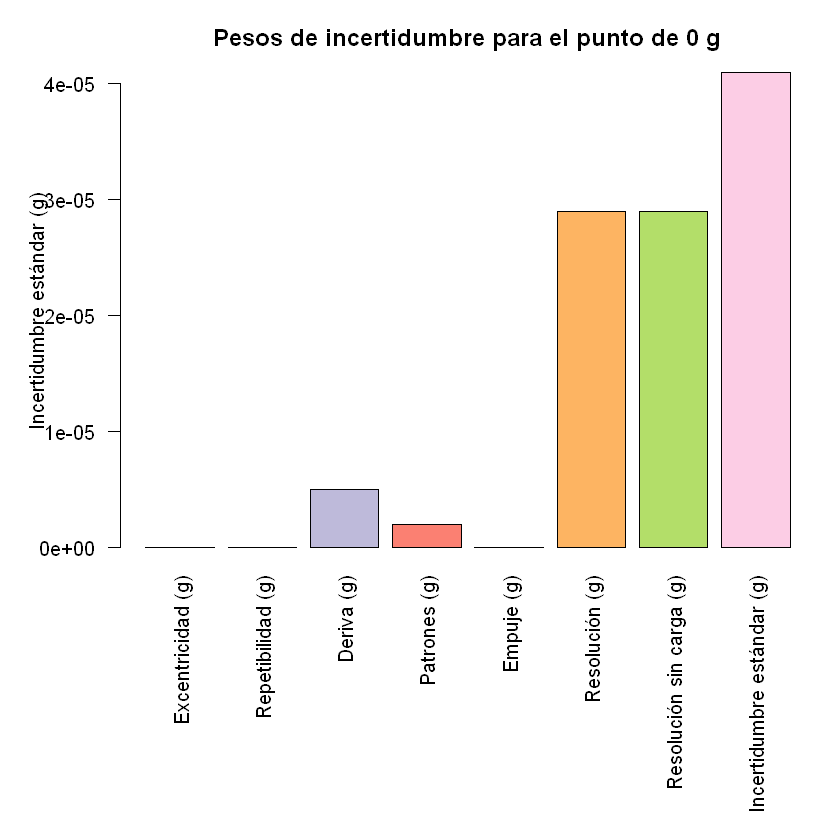

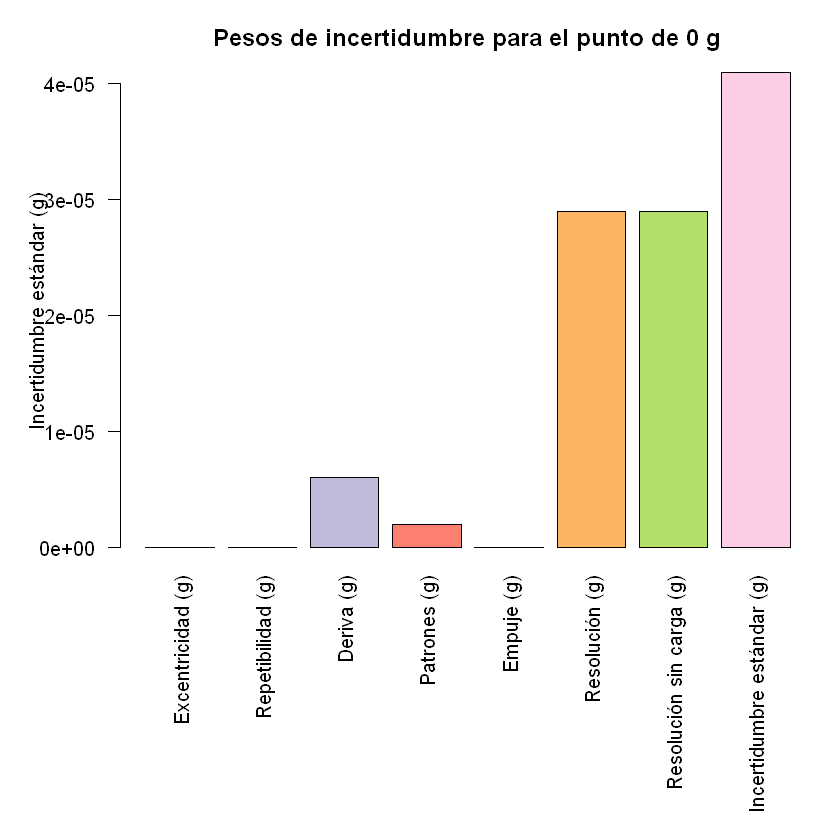

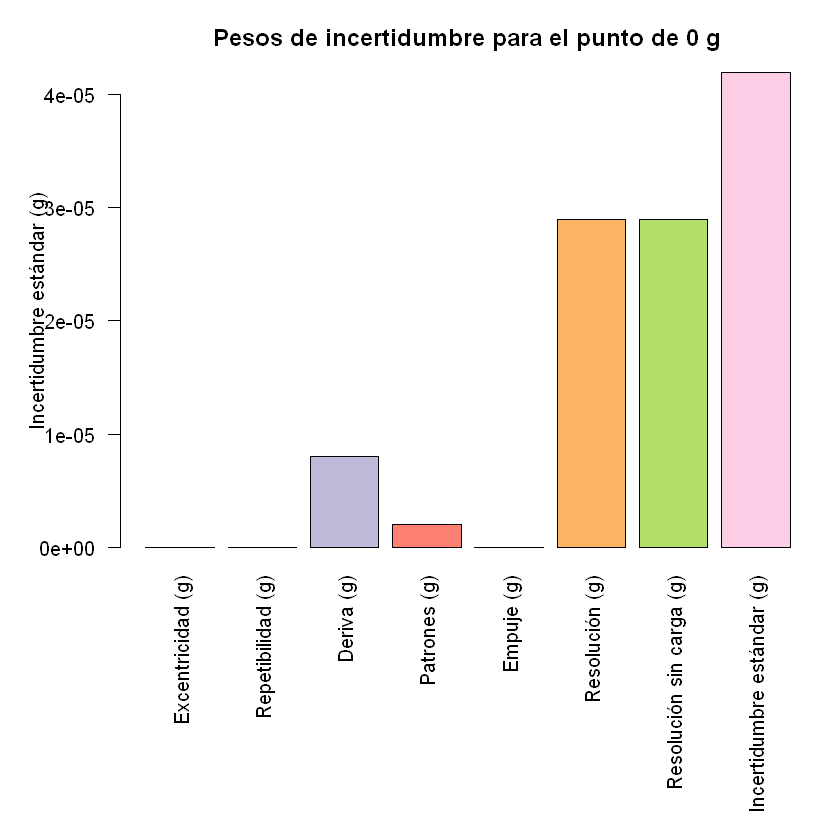

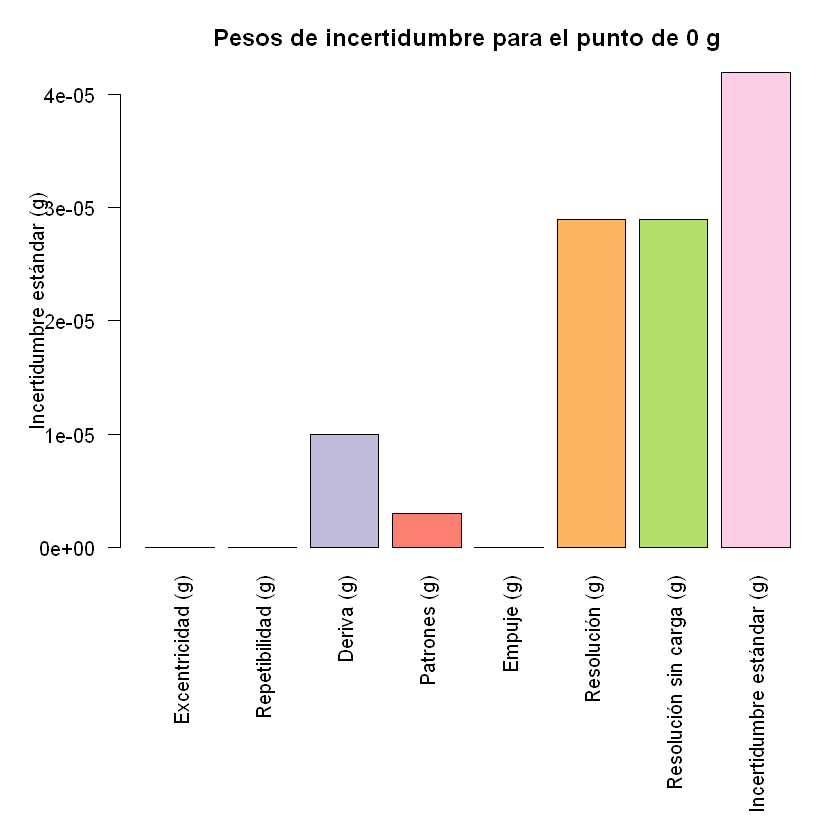

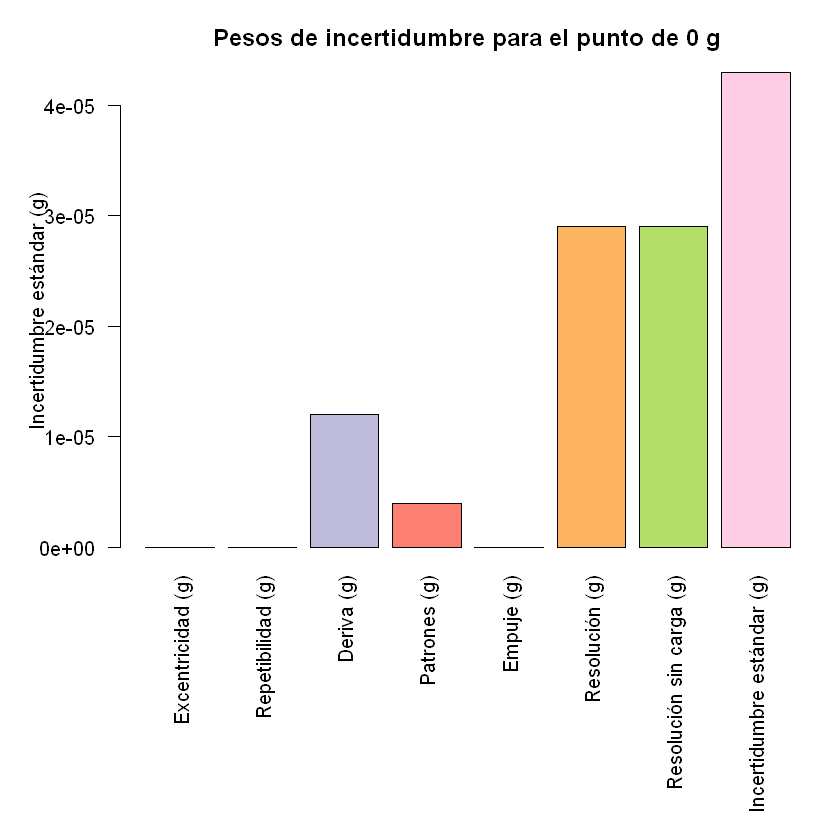

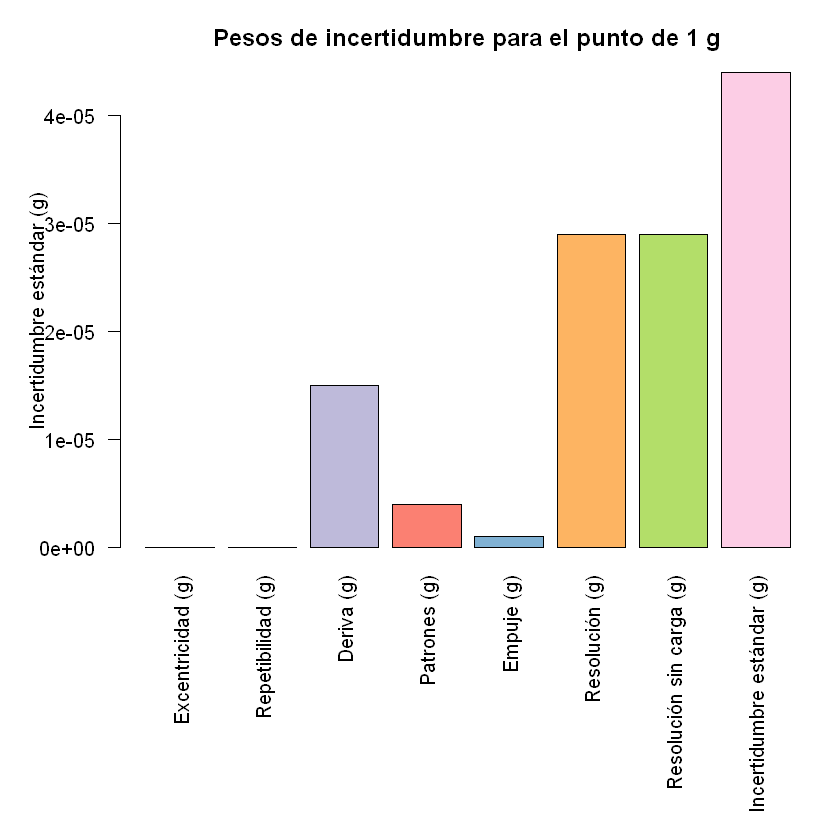

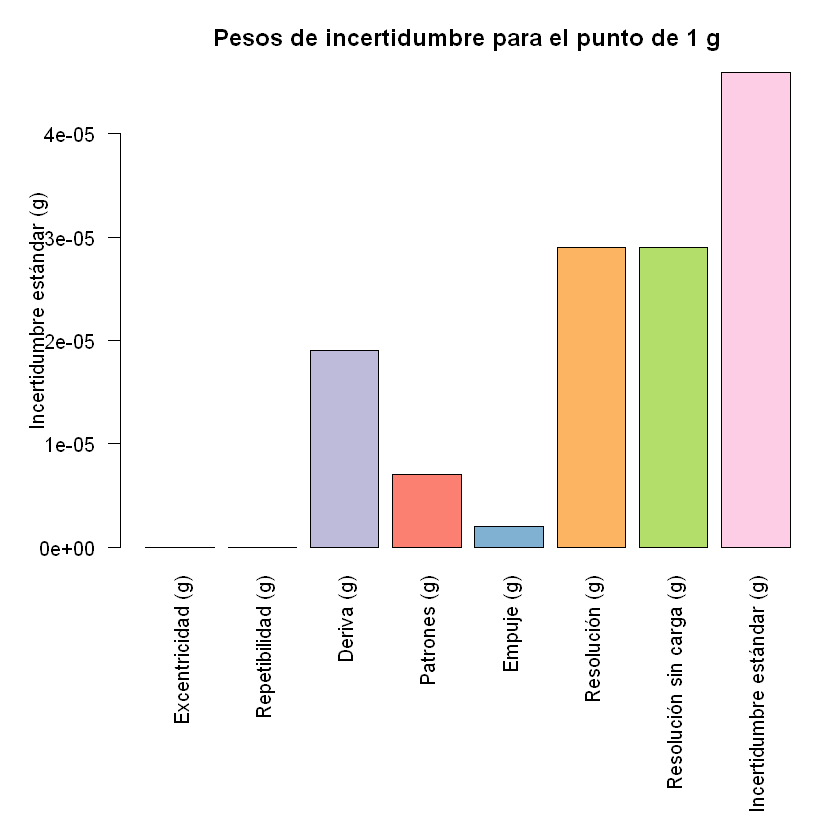

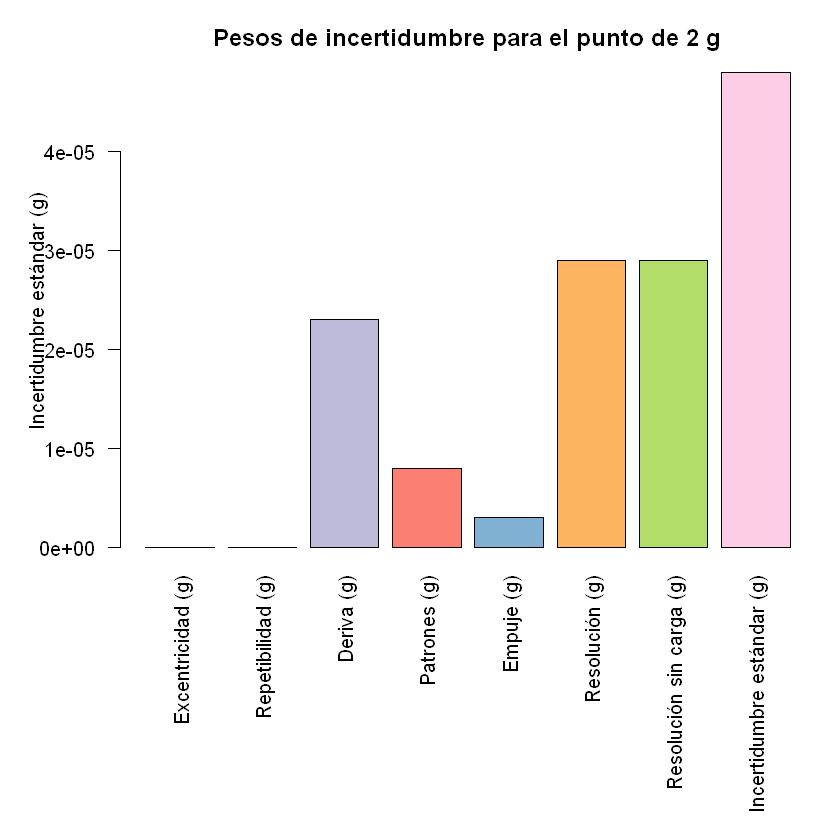

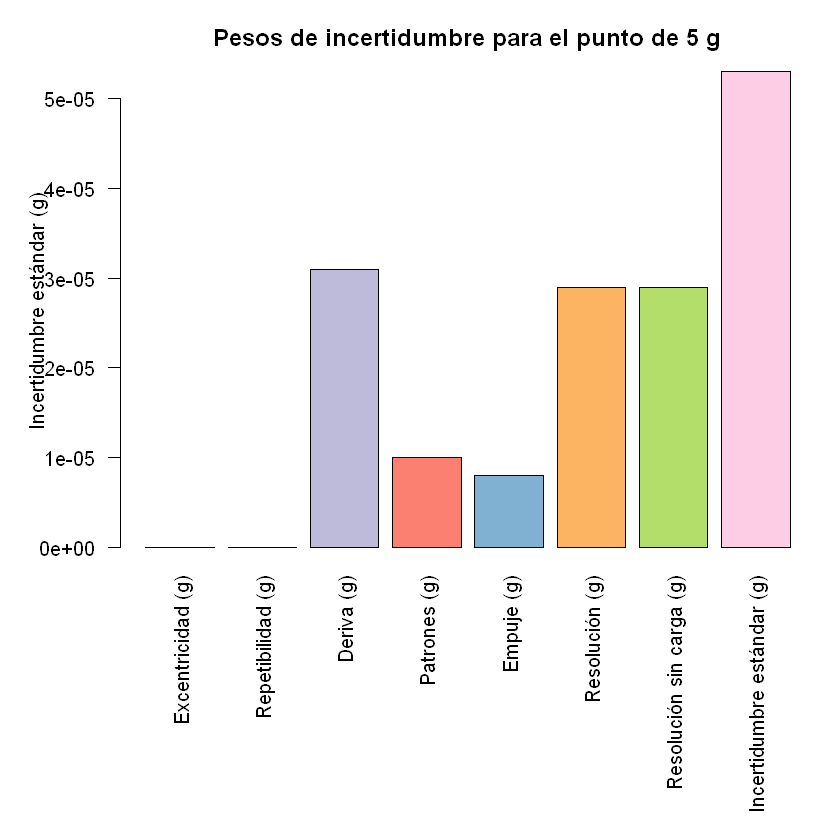

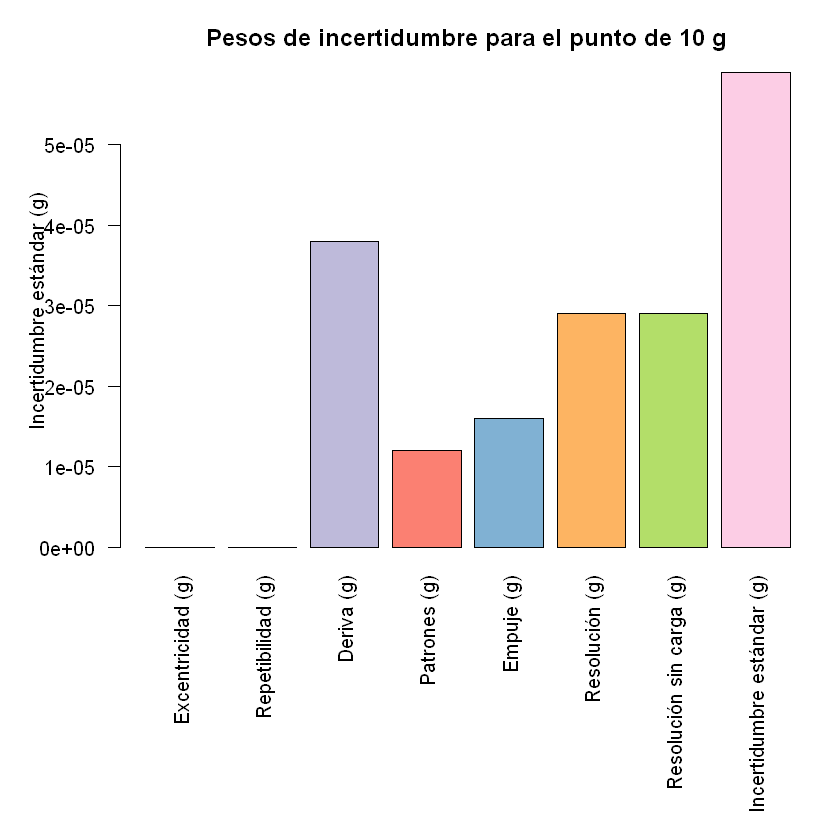

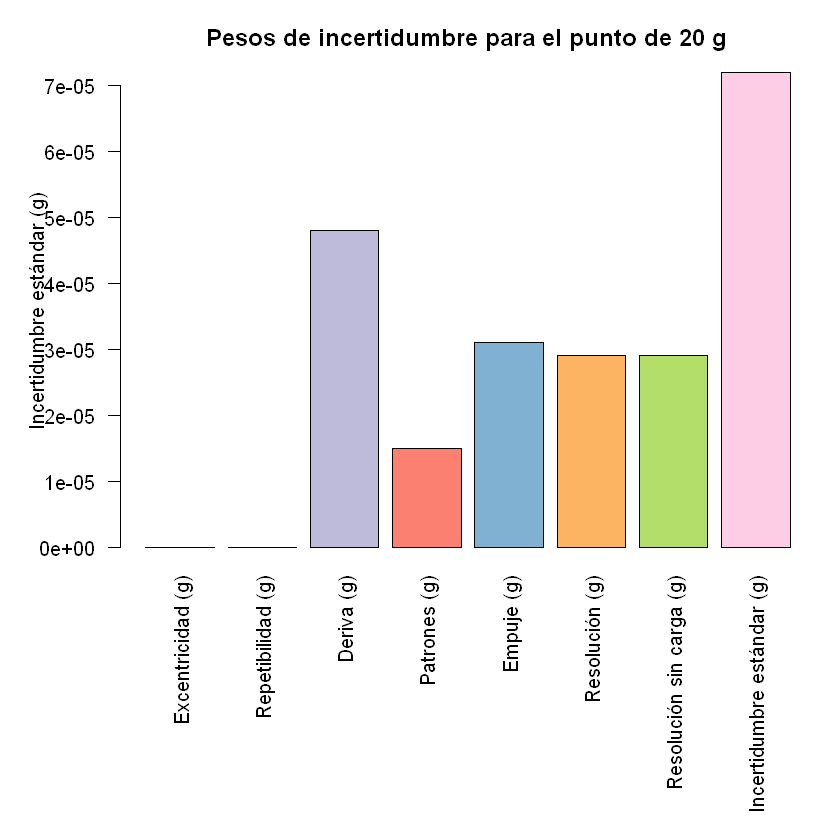

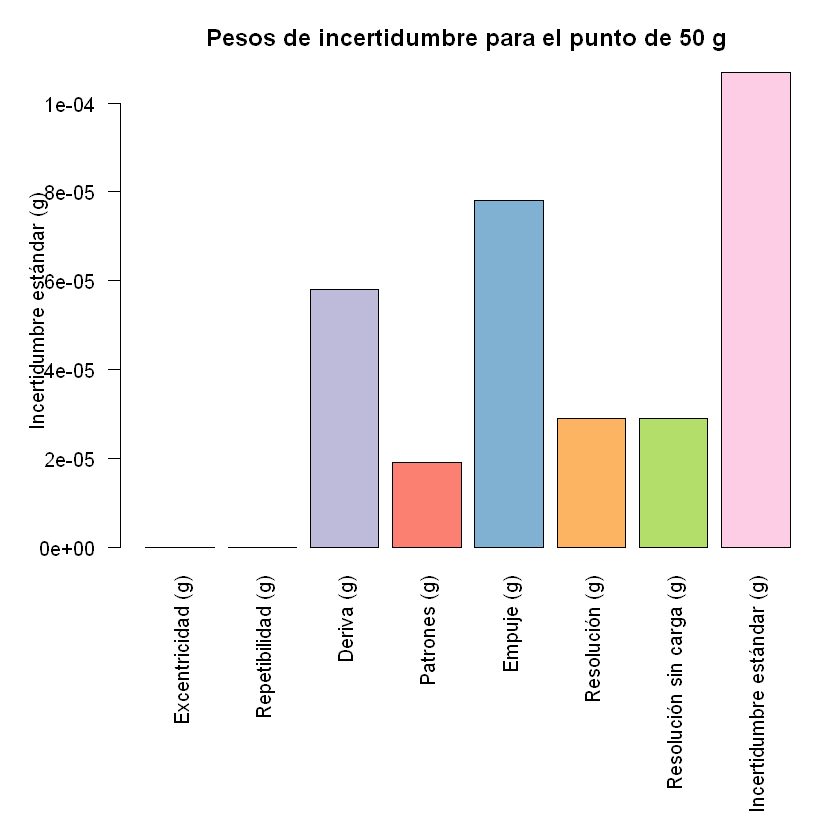

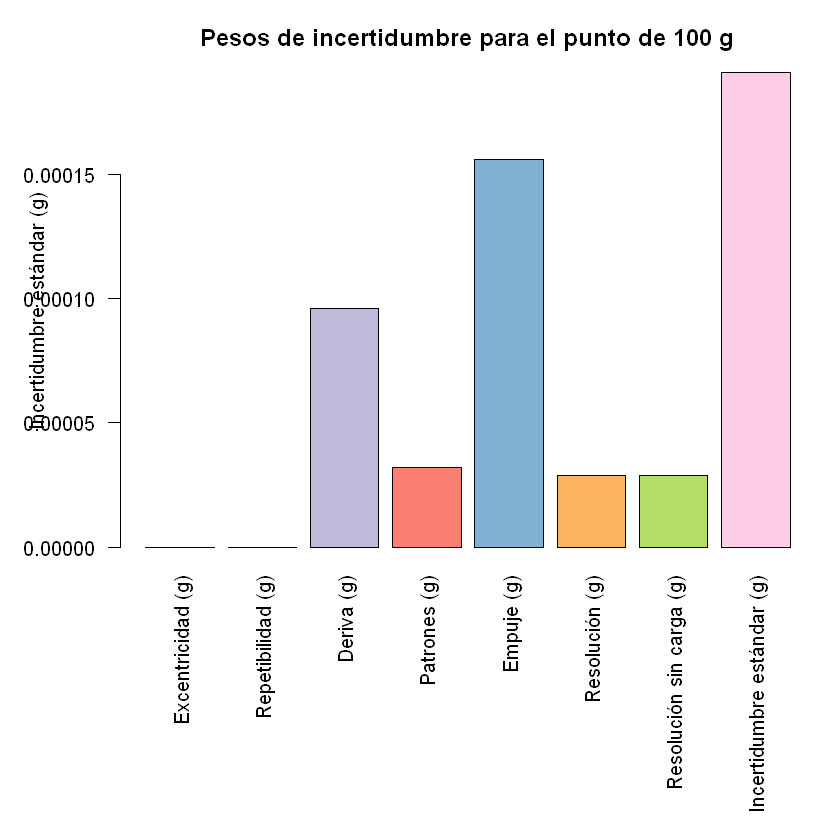

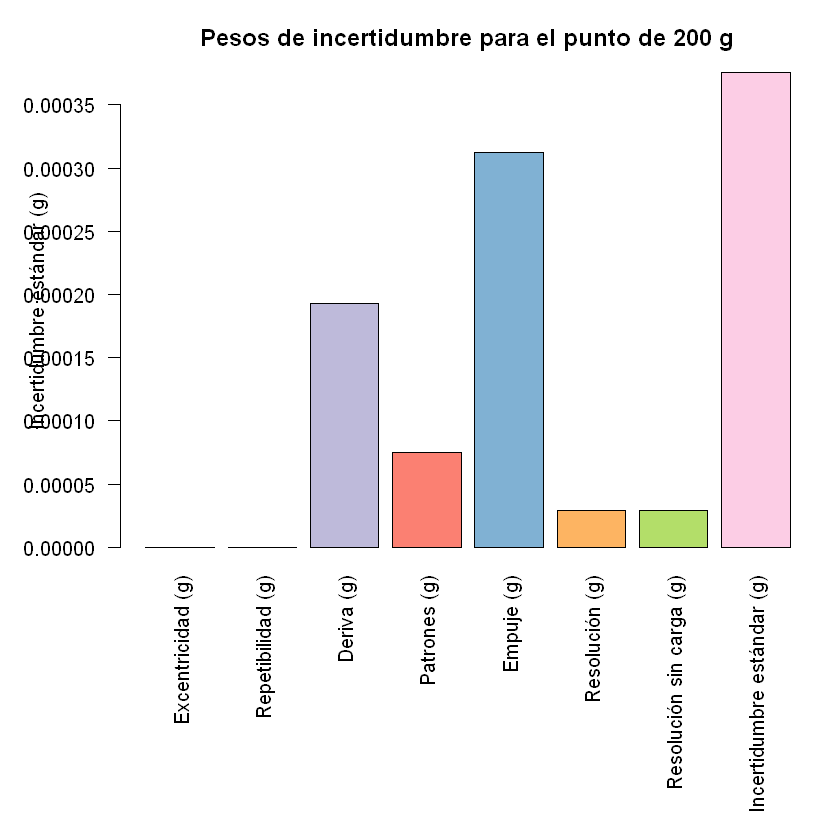

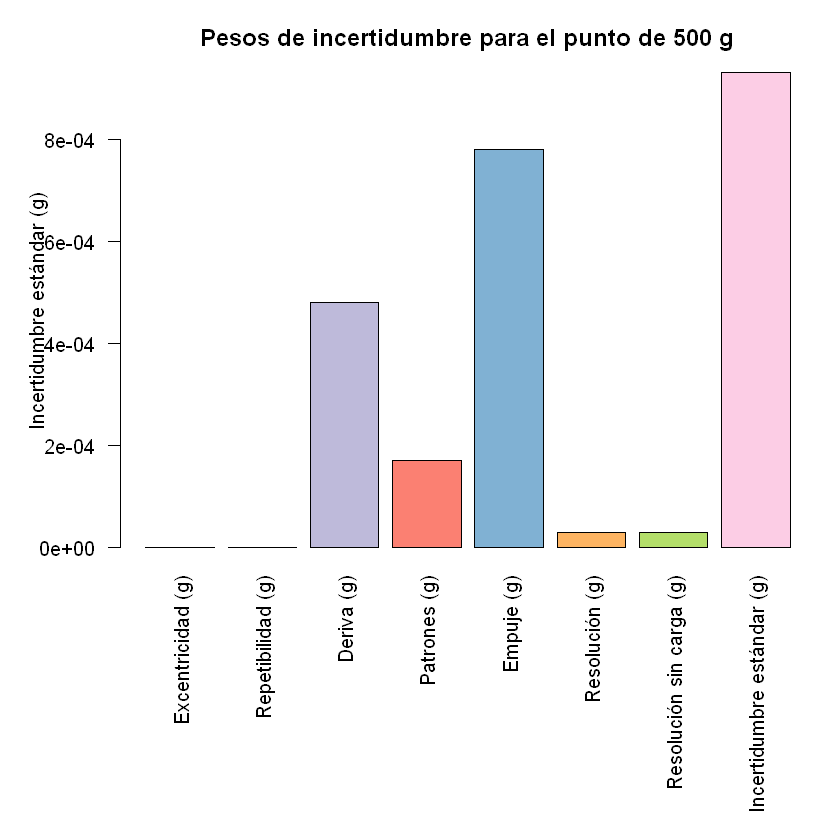

In [20]:
for (i in 1:(nrow(df))){
    par(mar=c(12,5,3,1))
    barplot(unlist(df[i,3:10]),names.arg=colnames(df)[3:10],las=2,col=coul, ylab="Incertidumbre estándar (g)",main=paste("Pesos de incertidumbre para el punto de",toString(round(m_c[i])),"g",sep=" "))
    }

In [21]:
jp01=df

In [22]:
jp01[,11]-jp02[,11]

[1] -1.0e-06  0.0e+00 -2.0e-06 -3.0e-06  0.0e+00 -1.5e-05 -5.4e-05 -1.0e-06
 [9]  0.0e+00  0.0e+00  0.0e+00 -4.0e-06  0.0e+00  0.0e+00  3.0e-06 -3.0e-06
[17]  0.0e+00 -7.0e-06

# Estimación en balanzas granatarias desde 500 g hasta 2000 g

La resolución seleccionada es de $0.01\textrm{ g}$ pues es la de la balanza granataria que se tiene en el laboratorio.

## JP-02

In [23]:
N=10**6
d=0.01 # kg
L_exc=1000 # kg
m_n=array(c(500,1000,2000),dim=c(3,1))
dmc=array(c(-0.00014,0.00385,0.0045),dim=c(3,1))
m_c=m_n+dmc
Is=c(500,1000,2000)
U_exp=array(c(0.00038,0.00073,0.0014),dim=c(3,1))
EMP=array(c(0.0025,0.005,0.01),dim=c(3,1))
Rep50=c(1000,1000,1000,1000,1000)
Rep100=c(2000,2000,2000,2000,2000)
I_exc=c(1000,1000,1000,1000,1000,1000)
dif_max=max(abs(I_exc[2:5]-mean(I_exc[1],I_exc[6])))
error=Is-m_c

In [24]:
u_res=array(dim=c(3,N),runif(3*N,-d/2,d/2))
u_res0=array(dim=c(3,N),runif(3*N,-d/2,d/2))
u_exc=array(dim=c(3,N),runif(3*N,-dif_max*Is/L_exc/2,dif_max*Is/L_exc/2))
u_der=array(dim=c(3,N),runif(3*N,-EMP/3,EMP/3))
u_rep=array(dim=c(3,N),rnorm(3*N,mean=0,sd=max(sd(Rep50),sd(Rep100))))
u_empj=array(dim=c(3,N),runif(3*N,-sqrt(3)*m_c*0.00000156,sqrt(3)*m_c*0.00000156))
u_mc=array(dim=c(3,N),rnorm(3*N,mean=0,sd=U_exp/2))

In [25]:
cal=rep(error,N)+u_mc+u_empj+u_res0+u_res+u_exc+u_der+u_rep

In [26]:
resumen=matrix(0,3,11)
for (i in 1:3){
    resumen[i,1]=Is[i]
    resumen[i,2]=round(mean(cal[i,]),6)
    resumen[i,3]=round(sd(u_exc[i,]),6)
    resumen[i,4]=round(sd(u_rep[i,]),6)
    resumen[i,5]=round(sd(u_der[i,]),6)
    resumen[i,6]=round(sd(u_mc[i,]),6)
    resumen[i,7]=round(sd(u_empj[i,]),6)
    resumen[i,8]=round(sd(u_res[i,]),6)
    resumen[i,9]=round(sd(u_res0[i,]),6)
    resumen[i,10]=round(sd(cal[i,]),6)
    resumen[i,11]=round(2*sd(cal[i,]),6)
    }
df=data.frame(resumen)
colnames(df)=c("Indicación (g)","Error de indicación (g)","Excentricidad (g)","Repetibilidad (g)","Deriva (g)","Patrones (g)","Empuje (g)","Resolución (g)","Resolución sin carga (g)","Incertidumbre estándar (g)","Incertidumbre expandida (g)")
df

Indicación (g) Error de indicación (g) Excentricidad (g) Repetibilidad (g)
1  500            0.000141               0                 0                
2 1000           -0.003847               0                 0                
3 2000           -0.004495               0                 0                
  Deriva (g) Patrones (g) Empuje (g) Resolución (g) Resolución sin carga (g)
1 0.000481   0.000190     0.000781   0.002887       0.002885                
2 0.000962   0.000365     0.001560   0.002887       0.002886                
3 0.001926   0.000700     0.003120   0.002888       0.002886                
  Incertidumbre estándar (g) Incertidumbre expandida (g)
1 0.004184                   0.008367                   
2 0.004487                   0.008973                   
3 0.005531                   0.011061

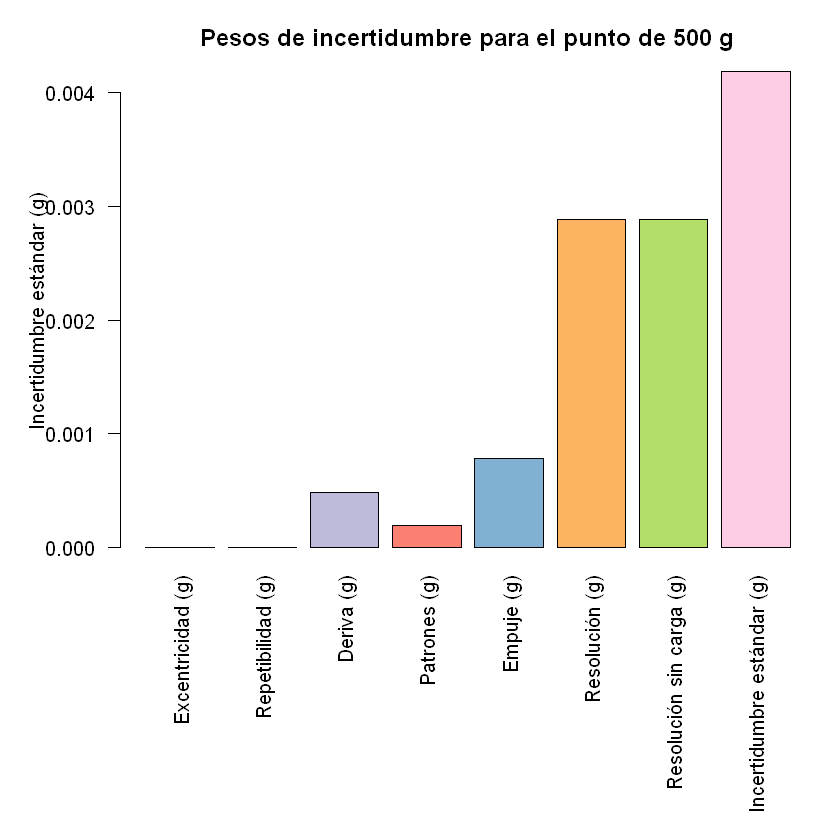

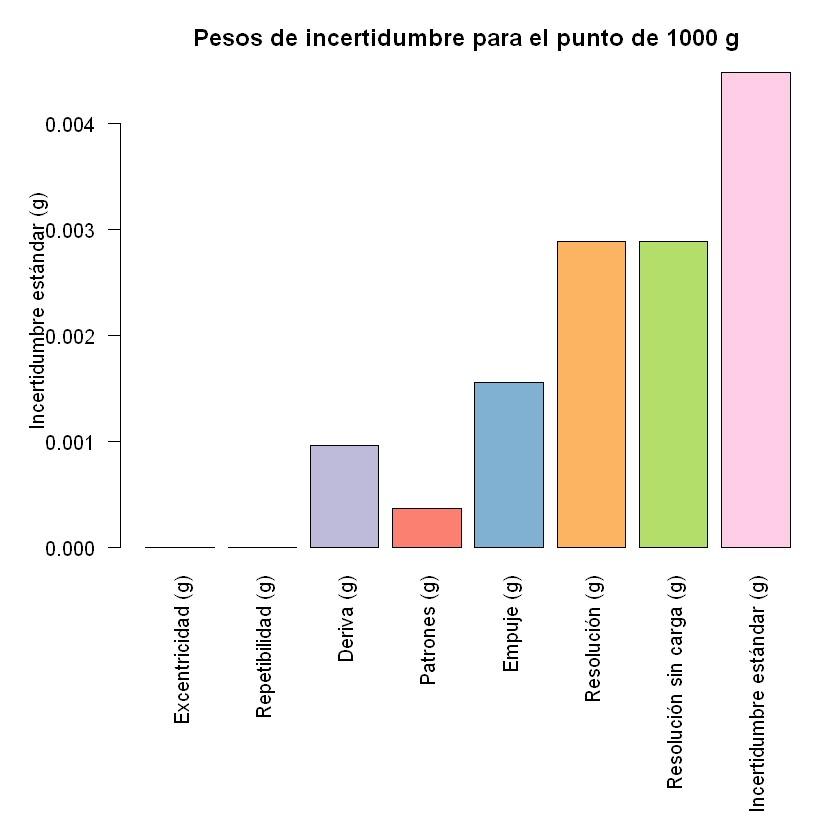

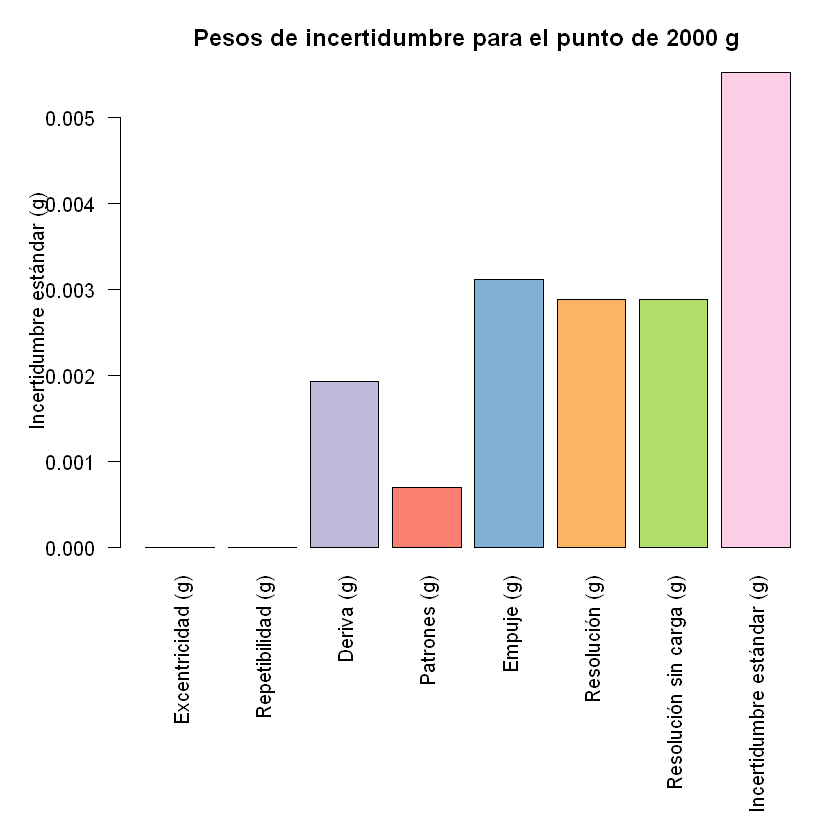

In [27]:
for (i in 1:(nrow(df))){
    par(mar=c(12,5,3,1))
    barplot(unlist(df[i,3:10]),names.arg=colnames(df)[3:10],las=2,col=coul, ylab="Incertidumbre estándar (g)",main=paste("Pesos de incertidumbre para el punto de",toString(round(m_c[i])),"g",sep=" "))
    }

In [28]:
jp02=df

## JP-01

In [29]:
N=10**6
d=0.01 # kg
L_exc=1000 # kg
# m_n=array(c(500,1000,2000),dim=c(3,1))
# dmc=array(c(-0.00014,0.00385,0.0045),dim=c(3,1))
m_c=array(c(500.00029,1000.00053,2000.0036),dim=c(3,1))
Is=c(500,1000,2000)
U_exp=array(c(0.34/1000,0.64/1000,1.7/1000),dim=c(3,1))
EMP=array(c(0.0025,0.005,0.01),dim=c(3,1))
Rep50=c(1000,1000,1000,1000,1000)
Rep100=c(2000,2000,2000,2000,2000)
I_exc=c(1000,1000,1000,1000,1000,1000)
dif_max=max(abs(I_exc[2:5]-mean(I_exc[1],I_exc[6])))
error=Is-m_c

In [30]:
u_res=array(dim=c(3,N),runif(3*N,-d/2,d/2))
u_res0=array(dim=c(3,N),runif(3*N,-d/2,d/2))
u_exc=array(dim=c(3,N),runif(3*N,-dif_max*Is/L_exc/2,dif_max*Is/L_exc/2))
u_der=array(dim=c(3,N),runif(3*N,-EMP/3,EMP/3))
u_rep=array(dim=c(3,N),rnorm(3*N,mean=0,sd=max(sd(Rep50),sd(Rep100))))
u_empj=array(dim=c(3,N),runif(3*N,-sqrt(3)*m_c*0.00000156,sqrt(3)*m_c*0.00000156))
u_mc=array(dim=c(3,N),rnorm(3*N,mean=0,sd=U_exp/2))

In [31]:
cal=rep(error,N)+u_mc+u_empj+u_res0+u_res+u_exc+u_der+u_rep

In [32]:
resumen=matrix(0,3,11)
for (i in 1:3){
    resumen[i,1]=Is[i]
    resumen[i,2]=round(mean(cal[i,]),6)
    resumen[i,3]=round(sd(u_exc[i,]),6)
    resumen[i,4]=round(sd(u_rep[i,]),6)
    resumen[i,5]=round(sd(u_der[i,]),6)
    resumen[i,6]=round(sd(u_mc[i,]),6)
    resumen[i,7]=round(sd(u_empj[i,]),6)
    resumen[i,8]=round(sd(u_res[i,]),6)
    resumen[i,9]=round(sd(u_res0[i,]),6)
    resumen[i,10]=round(sd(cal[i,]),6)
    resumen[i,11]=round(2*sd(cal[i,]),6)
    }
df=data.frame(resumen)
colnames(df)=c("Indicación (g)","Error de indicación (g)","Excentricidad (g)","Repetibilidad (g)","Deriva (g)","Patrones (g)","Empuje (g)","Resolución (g)","Resolución sin carga (g)","Incertidumbre estándar (g)","Incertidumbre expandida (g)")
df

Indicación (g) Error de indicación (g) Excentricidad (g) Repetibilidad (g)
1  500           -0.000301               0                 0                
2 1000           -0.000533               0                 0                
3 2000           -0.003600               0                 0                
  Deriva (g) Patrones (g) Empuje (g) Resolución (g) Resolución sin carga (g)
1 0.000481   0.00017      0.000780   0.002887       0.002885                
2 0.000963   0.00032      0.001559   0.002887       0.002886                
3 0.001925   0.00085      0.003119   0.002886       0.002885                
  Incertidumbre estándar (g) Incertidumbre expandida (g)
1 0.004190                   0.008380                   
2 0.004485                   0.008970                   
3 0.005545                   0.011089

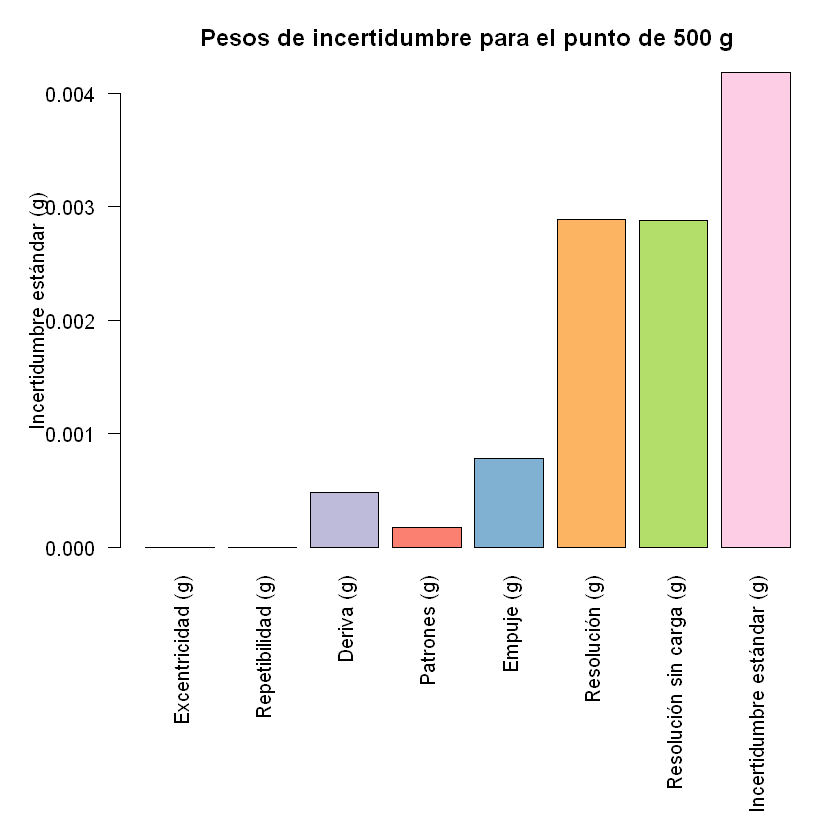

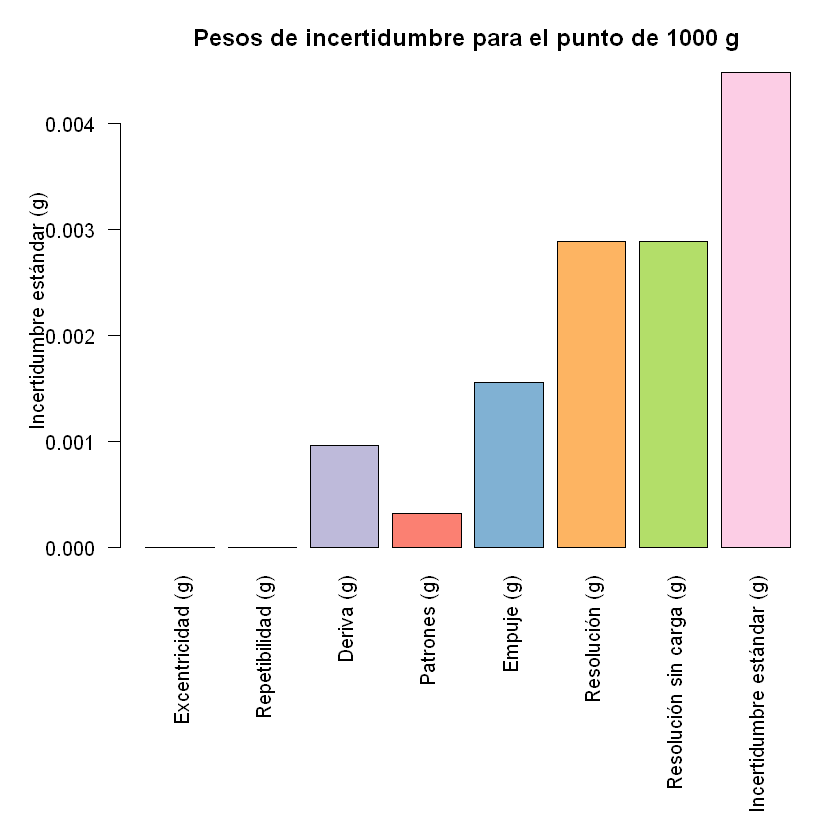

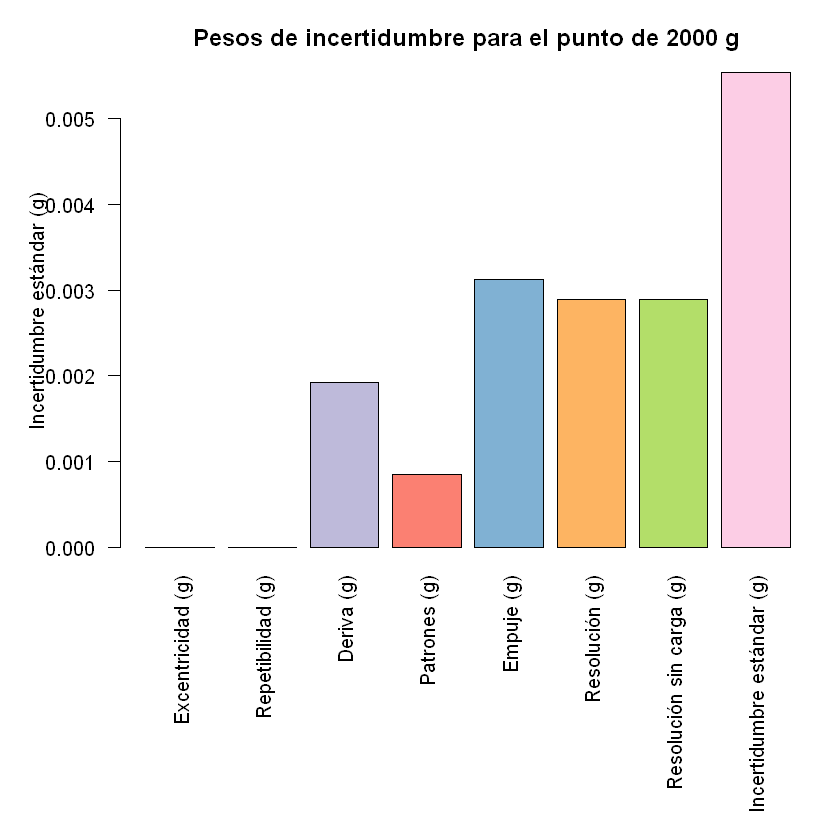

In [33]:
for (i in 1:(nrow(df))){
    par(mar=c(12,5,3,1))
    barplot(unlist(df[i,3:10]),names.arg=colnames(df)[3:10],las=2,col=coul, ylab="Incertidumbre estándar (g)",main=paste("Pesos de incertidumbre para el punto de",toString(round(m_c[i])),"g",sep=" "))
    }

In [34]:
jp01=df

In [35]:
jp01[,11]-jp02[,11]

[1]  1.3e-05 -3.0e-06  2.8e-05